# <font color='pink'>DATA DESCRIPTION</font>

####

### The dataset contains different players names ,their earnings in different years ,thier nationality with current ranks and previous year ranks. The players are selected as richest player by Forbes.



####

# <font color='pink'>FEATURES DESCRIPTION</font>

######
### CATEGORICAL FEATURES

* **Nationality**: Country where the players are from
* **Sport**:The type of Sport played by different players

#####

### NUMERICAL FEATURES

* **Current Rank**: The rank of players at present
* **Previous Year Rank**: Rank of the player in previous year
* **Year**: The year of different games
* **Earnings ($ million)**: The earnings of the players 

# <font color='pink'>1) IMPORTING LIBRARIES</font>

####

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# <font color='pink'>2) IMPORTING DATASET</font>

###

In [2]:
dataset=pd.read_csv(r'Forbes_Richest_Atheletes.csv')

# <font color='pink'>3) DATA UNDERSTADING</font>

####

In [3]:
dataset.head()

S.NO               Name Nationality  Current Rank Previous Year Rank  \
0     1         Mike Tyson         USA             1                NaN   
1     2     Buster Douglas         USA             2                NaN   
2     3  Sugar Ray Leonard         USA             3                NaN   
3     4       Ayrton Senna      Brazil             4                NaN   
4     5        Alain Prost      France             5                NaN   

         Sport  Year  earnings ($ million)  
0       boxing  1990                  28.6  
1       boxing  1990                  26.0  
2       boxing  1990                  13.0  
3  auto racing  1990                  10.0  
4  auto racing  1990                   9.0

In [4]:
dataset.shape

(301, 8)

In [5]:
dataset.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [6]:
dataset.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [7]:
dataset.nunique()

S.NO                    301
Name                     82
Nationality              22
Current Rank             10
Previous Year Rank       36
Sport                    29
Year                     30
earnings ($ million)    198
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [9]:
dataset.isnull().sum().sort_values()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Sport                    0
Year                     0
earnings ($ million)     0
Previous Year Rank      24
dtype: int64

In [10]:
dataset.duplicated().sum()

0

In [11]:
dataset.nunique()

S.NO                    301
Name                     82
Nationality              22
Current Rank             10
Previous Year Rank       36
Sport                    29
Year                     30
earnings ($ million)    198
dtype: int64

In [12]:
dataset.describe().T

count         mean        std     min     25%     50%  \
S.NO                  301.0   151.000000  87.035433     1.0    76.0   151.0   
Current Rank          301.0     5.448505   2.850995     1.0     3.0     5.0   
Year                  301.0  2005.122924   9.063563  1990.0  1997.0  2005.0   
earnings ($ million)  301.0    45.516279  33.525337     8.1    24.0    39.0   

                         75%     max  
S.NO                   226.0   301.0  
Current Rank             8.0    10.0  
Year                  2013.0  2020.0  
earnings ($ million)    59.4   300.0

In [13]:
dataset.describe(include='O')

Name Nationality Previous Year Rank       Sport
count           301         301                277         301
unique           82          22                 36          29
top     Tiger Woods         USA                >10  Basketball
freq             19         206                 36          54

# <font color='pink'>4) DATA CLEANING<font>
    
####

#####
#### <font color='white'>4.1) TREATING MISSING VALUES</font>

In [14]:
dataset['Previous Year Rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [15]:
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('not ranked',np.nan)
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('none',np.nan)
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('?',np.nan)
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('??',np.nan)

In [16]:
#for null values
dataset['Previous Year Rank'].fillna(dataset['Current Rank'], inplace=True)

In [17]:
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('>10',15)
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('>14',20)
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('>20',25)
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('>30',35)
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('>40',45)
dataset['Previous Year Rank']=dataset['Previous Year Rank'].replace('>100',105)

In [18]:
dataset['Previous Year Rank']=dataset['Previous Year Rank'].astype('int64')

In [19]:
dataset.isnull().sum().sort_values()

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

#####
# <font color='pink'>5) EXPLORATORY DATA ANALYSIS(EDA)<font>

####

##### <font color='white'>5.1) UNIVARIATE ANALYSIS</font>

#####
#### <h10>5.1.1) Current Rank</h10>

In [20]:
dataset['Current Rank'].describe()

count    301.000000
mean       5.448505
std        2.850995
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Current Rank, dtype: float64

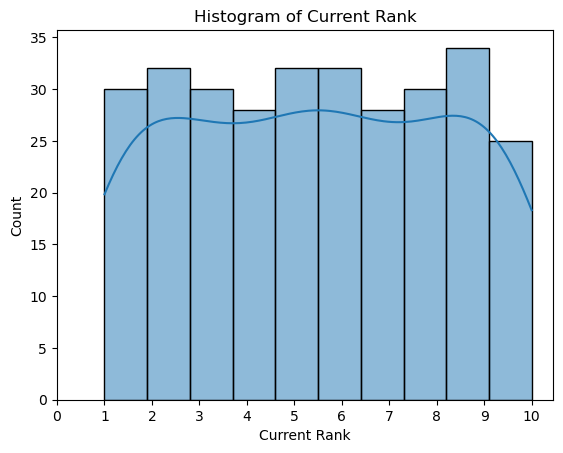

In [21]:
sns.histplot(data=dataset,x='Current Rank',kde=True)
plt.xticks(np.arange(0,11,1))
plt.title('Histogram of Current Rank')
plt.show()

<Axes: xlabel='Current Rank'>

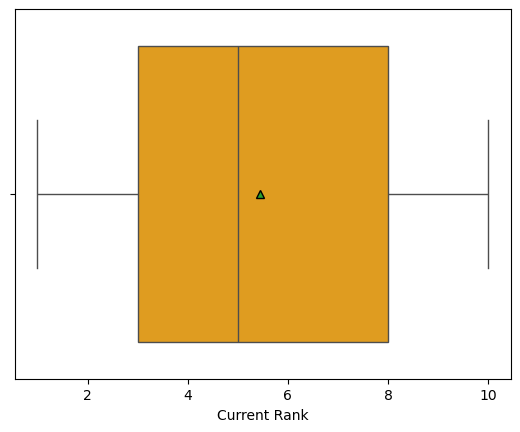

In [22]:
sns.boxplot(data=dataset,x='Current Rank',color='orange',showmeans=True,meanprops={'marker':'^','markeredgecolor':'black'})

#### From above figures:
#####

##### Minimum current rank of players is 1 whereas the maximum rank seems 10.
##### Players having current rank of 9 seem to be the highest in number.

#####
#### <h10>5.1.2) Previous Year Rank</h10>

In [23]:
dataset['Previous Year Rank'].describe()

count    301.000000
mean      11.109635
std       15.862680
min        1.000000
25%        4.000000
50%        7.000000
75%       15.000000
max      105.000000
Name: Previous Year Rank, dtype: float64

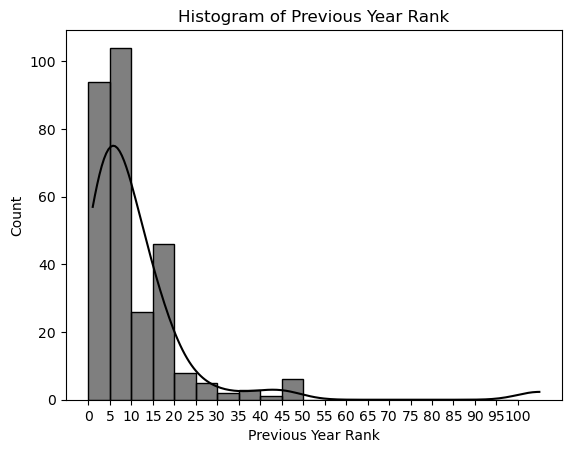

In [24]:
sns.histplot(data=dataset,x='Previous Year Rank',kde=True,bins=np.arange(0,105,5),color='black')
plt.xticks(np.arange(0,105,5))
plt.title('Histogram of Previous Year Rank')
plt.show()

Text(0.5, 1.0, 'Boxplot of Previous Year Rank')

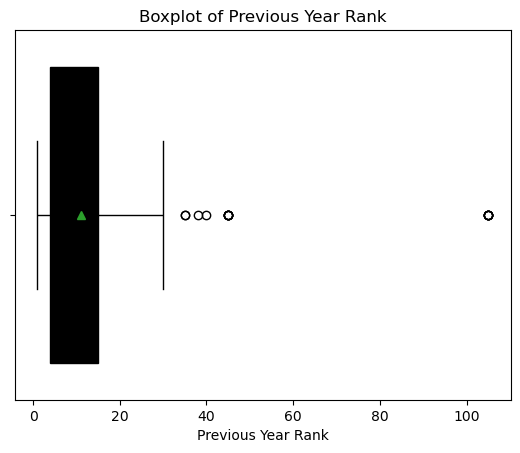

In [25]:
sns.boxplot(data=dataset,x='Previous Year Rank',color='black',showmeans=True)
plt.title('Boxplot of Previous Year Rank')

#### From above figures :
#####
##### Previous year rank ranges from 1 to 105 .
##### The boxplot shows that some ranks lie in the right most part ,hence those  are much  greater among others.

#####
#### <h10>5.1.3) Earings (in $ million)</h10>

In [26]:
dataset['earnings ($ million)'].describe()

count    301.000000
mean      45.516279
std       33.525337
min        8.100000
25%       24.000000
50%       39.000000
75%       59.400000
max      300.000000
Name: earnings ($ million), dtype: float64

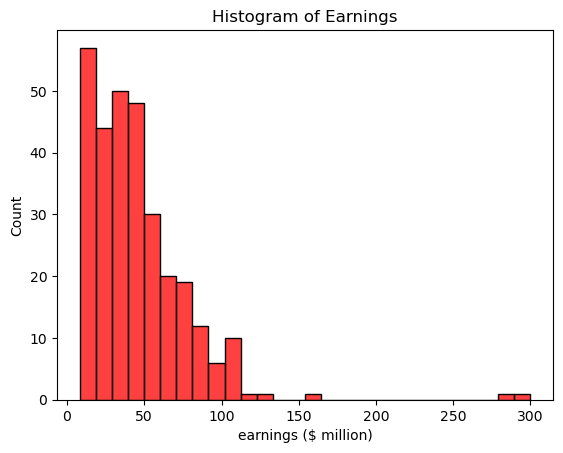

In [27]:
sns.histplot(data=dataset,x='earnings ($ million)',color='red')
plt.title("Histogram of Earnings")
plt.show()

Text(0.5, 1.0, 'Boxplot of Earnings')

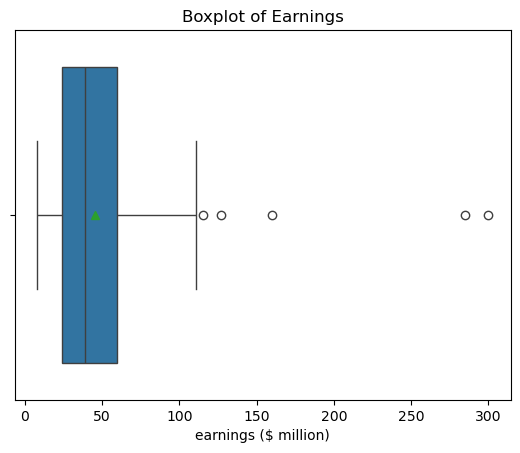

In [28]:
sns.boxplot(data=dataset,x='earnings ($ million)',showmeans=True)
plt.title("Boxplot of Earnings")

#### From above figures:
####
#### Players earnings range from 8 millions to 300 millions with an average earnings of 45 millions.
#### The histogram is right skewed hence few players earn a very large amount of money.
#### From boxplot we can see that earnings greater (close to 110) millions are considered as outliers.

#####
#### <h10>5.1.4) Nationality</h10>

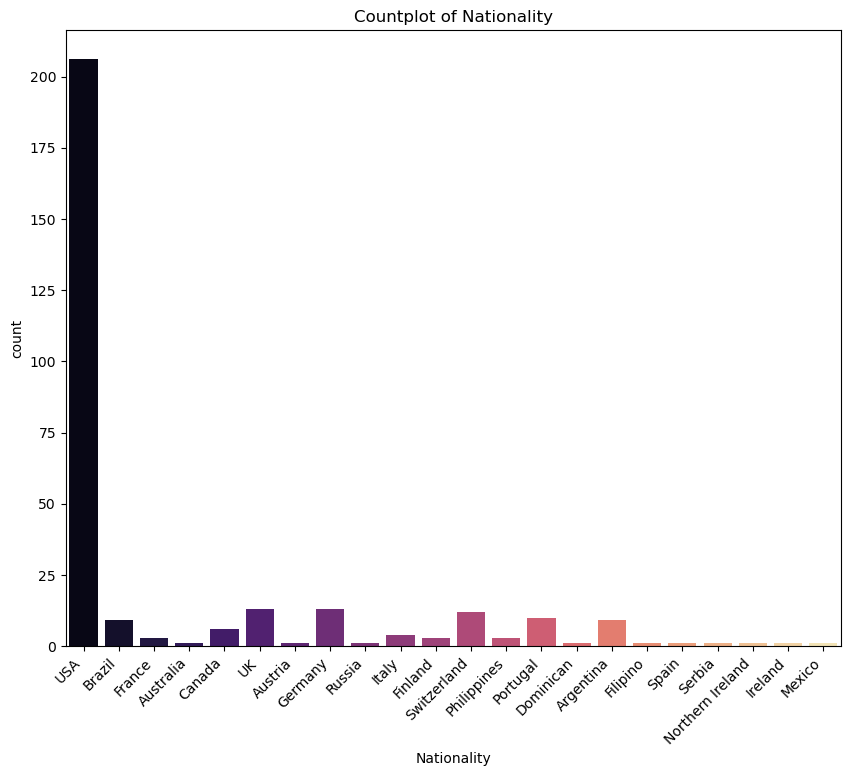

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset,x='Nationality',palette='magma')
plt.title('Countplot of Nationality')
plt.xticks(rotation=45,ha='right')
plt.show()

#### The observations from above countplot is:
#####
##### Most of the players are from the USA.
##### Germany ,UK, Switzerland ,Protugal also have players in a good amount however,
##### few coutries like Austria,Mexico,Ireland and so on have only 1 player total in each.

#####
#### <h10>5.1.5) Sport</h10>

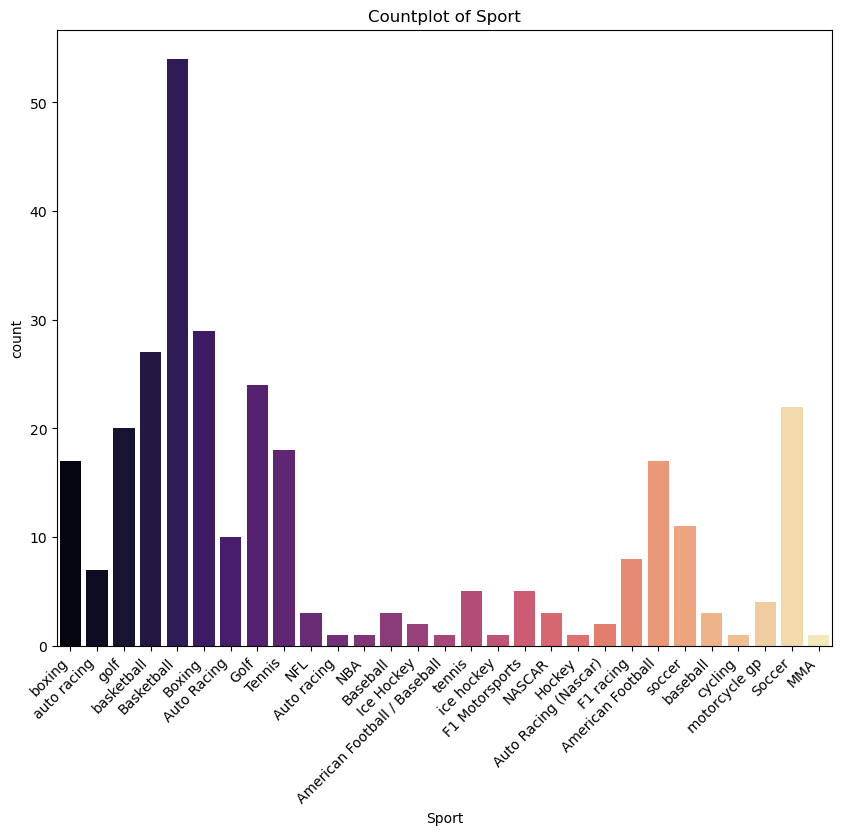

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset,x='Sport',palette='magma')
plt.title('Countplot of Sport')
plt.xticks(rotation=45,ha='right')
plt.show()

### From above countplot:
#####
##### Most of the players play Basketball following Boxing.
##### Only few players are engaged in NBA,Auto racing , MMA .

#####
#### <h10>5.1.6) Year</h10>

In [31]:
dataset['Year'].describe()

count     301.000000
mean     2005.122924
std         9.063563
min      1990.000000
25%      1997.000000
50%      2005.000000
75%      2013.000000
max      2020.000000
Name: Year, dtype: float64

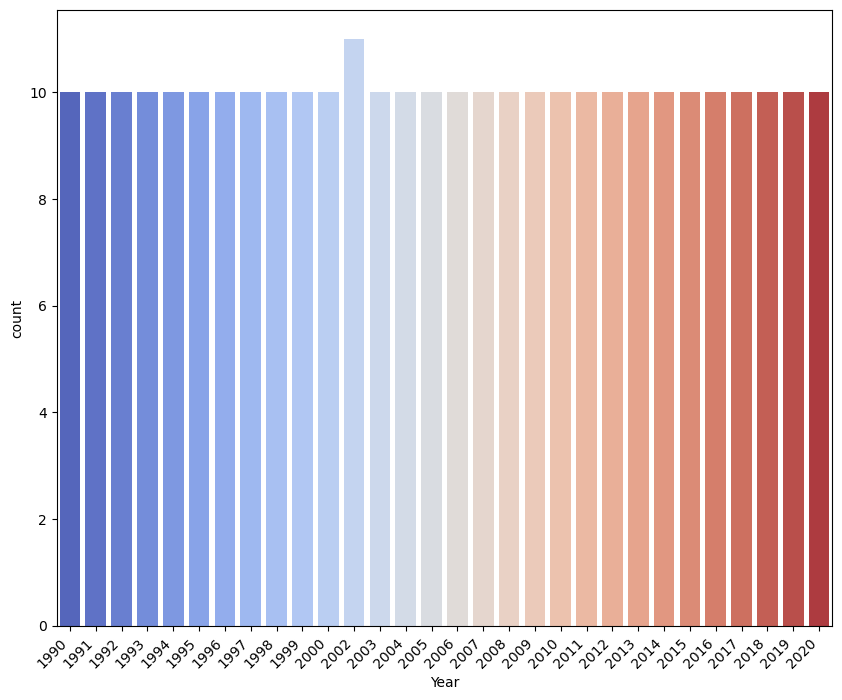

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset,x='Year',palette='coolwarm')
plt.xticks(rotation=45,ha='right');

#### From above countplot:
#####         
##### 2002 is the year when many players were active , and the other remaining years  have same number of players

####



##### <font color='white'>5.2) BIVARIATE ANALYSIS</font>

#####
#### <h10>5.2.1) Current Rank VS Earnings</h10>

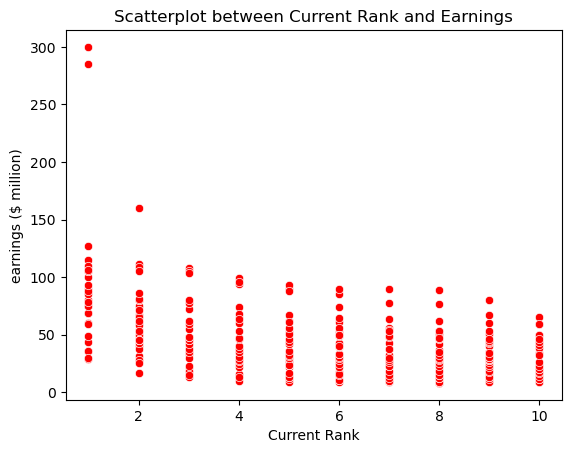

In [33]:
sns.scatterplot(data=dataset,x='Current Rank',y='earnings ($ million)',color='red')
plt.title('Scatterplot between Current Rank and Earnings')
plt.show()

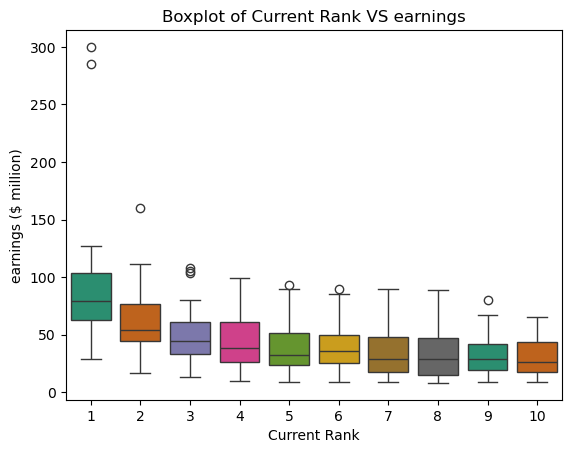

In [34]:
sns.boxplot(data=dataset,x='Current Rank',y='earnings ($ million)',palette='Dark2')
plt.title('Boxplot of Current Rank VS earnings')
plt.show()

#### From above scatterplot and boxplot:
#####           
#### we found that current rank determines the earnings of the players . 
#### Players having rank 1 tend to earn more than players having other ranks.
#### Similary this follows for rank 2 ,3 ,4 and so on.
####           

#### To verify that Current Rank is a good feature to determine earnings of players , Let's do Hypothesis testing.(T-Test)
####
#### Null Hypothesis(Ho): Current Ranks and earnings have no association.
#### Alternate Hypothesis(H1): Current Ranks and earnings are related. Hence Current Ranks
#### determine earnings.

#### Groups:
 #####  
##### Lets group our dataset based on current rank .  
##### (1,2,3,4,5)=1-5 and (6,7,8,9,10)=6-10.
##### Now lets calculate the mean earnings of each rank group (1-5/6-10).
##### Then perform independent T-TEST between pairs of rank groups to  determine if there  are significant differences in earnings between them.

In [35]:
def assign_rank_group(rank):
    if rank<=5:
        return '1-5'
    else:
        return '6-10'

dataset['current_rank_group']=dataset['Current Rank'].apply(assign_rank_group)

In [36]:
dataset.head()

S.NO               Name Nationality  Current Rank  Previous Year Rank  \
0     1         Mike Tyson         USA             1                   1   
1     2     Buster Douglas         USA             2                   2   
2     3  Sugar Ray Leonard         USA             3                   3   
3     4       Ayrton Senna      Brazil             4                   4   
4     5        Alain Prost      France             5                   5   

         Sport  Year  earnings ($ million) current_rank_group  
0       boxing  1990                  28.6                1-5  
1       boxing  1990                  26.0                1-5  
2       boxing  1990                  13.0                1-5  
3  auto racing  1990                  10.0                1-5  
4  auto racing  1990                   9.0                1-5

In [37]:
rank_groups = dataset.groupby('Current Rank')
for Current_rank, data in rank_groups:
    print('Current Rank:',Current_rank)
    print('data:',data)

Current Rank: 1
data:      S.NO                Name  Nationality  Current Rank  Previous Year Rank  \
0       1          Mike Tyson          USA             1                   1   
10     11   Evander Holyfield          USA             1                   8   
20     21      Michael Jordan          USA             1                   3   
30     31      Michael Jordan          USA             1                   1   
40     41      Michael Jordan          USA             1                   1   
50     51      Michael Jordan          USA             1                   1   
60     61          Mike Tyson          USA             1                   2   
70     71      Michael Jordan          USA             1                   2   
80     81      Michael Jordan          USA             1                   1   
90     91  Michael Schumacher      Germany             1                   2   
100   101  Michael Schumacher      Germany             1                   1   
110   111         

In [38]:
mean_earnings_per_rank_group=rank_groups['earnings ($ million)'].mean()
mean_earnings_per_rank_group

Current Rank
1     91.396667
2     61.381250
3     49.350000
4     44.164286
5     38.593750
6     38.959375
7     34.189286
8     32.366667
9     31.882353
10    31.328000
Name: earnings ($ million), dtype: float64

In [39]:
import random

earnings_1_5 = dataset[dataset['current_rank_group'] == '1-5']['earnings ($ million)']
earnings_6_10 = dataset[dataset['current_rank_group'] == '6-10']['earnings ($ million)']

earnings_1_5 = earnings_1_5.values.tolist()
earnings_1_5 = random.sample(earnings_1_5, 100)
earnings_6_10 = earnings_6_10.values.tolist()
earnings_6_10 = random.sample(earnings_6_10, 100)

In [40]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(earnings_1_5, earnings_6_10, equal_var=False)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.178605034955802
P-value: 8.061750944833398e-07


In [41]:
if(p_value<=0.05):
    print("We reject Null Hypothesis hence, Current Rank and Earnings have association")
else:
    print('Fail to reject Null Hypothesis: Current Ranks and Earning are independent')

We reject Null Hypothesis hence, Current Rank and Earnings have association


#### Final Conclusion:
####
#### We can conclude that there is significant difference in the mean earnings of current rank 
##### groups (1-5) and current rank groups(6-10). 
#### It means that current rank has some  contribution to distinguish earnings.

##### 
#### <h10>5.2.2) Previous Year Rank VS Earnings</h10>

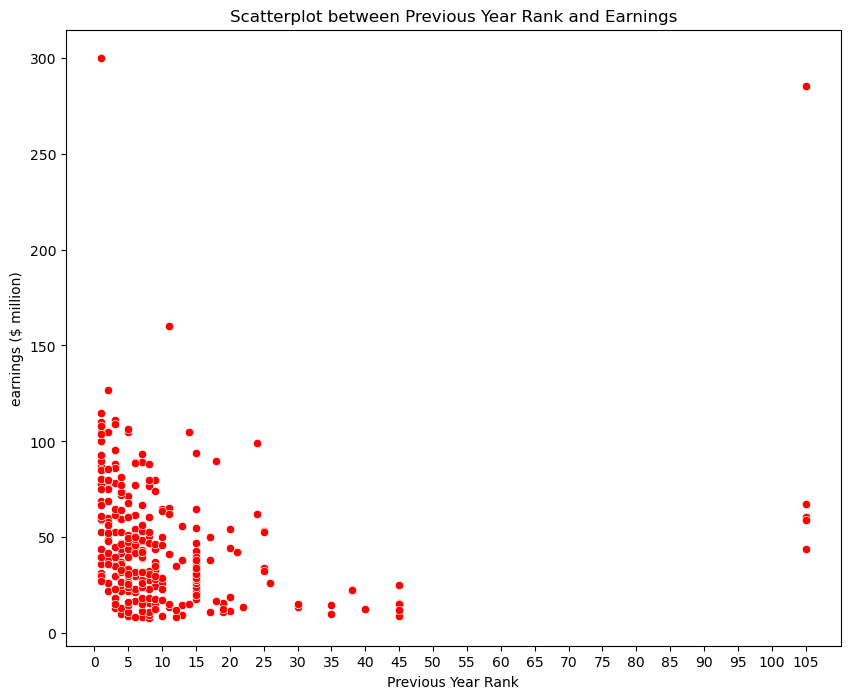

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dataset,x='Previous Year Rank',y='earnings ($ million)',color='red')
plt.title('Scatterplot between Previous Year Rank and Earnings')
plt.xticks(np.arange(0,110,5))
plt.show()

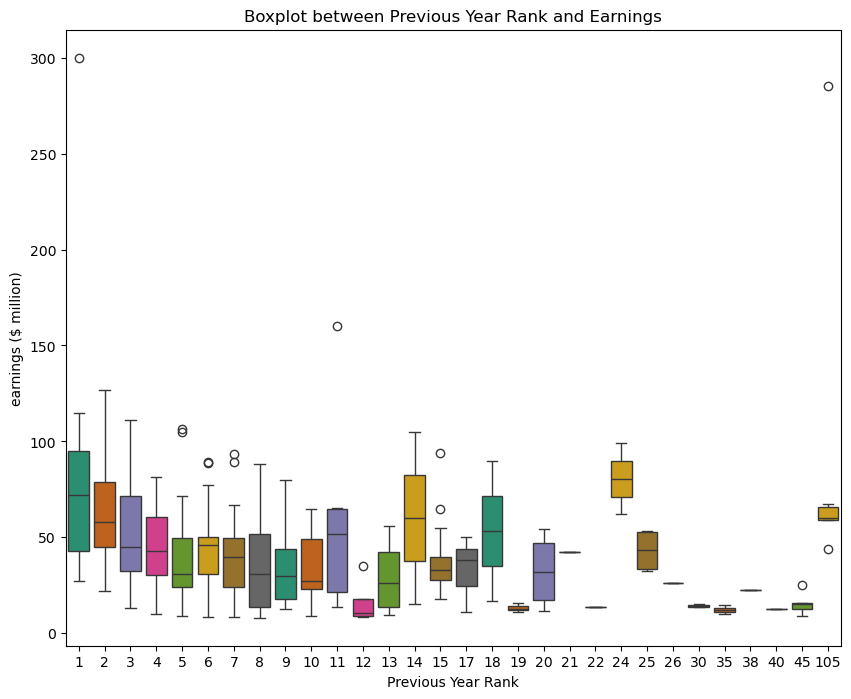

In [43]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dataset,x='Previous Year Rank',y='earnings ($ million)',palette='Dark2')
plt.title('Boxplot between Previous Year Rank and Earnings')
plt.show()

#### From above figure:
##### 
#### It is not clear if previous year rank is associated with earning. Some rankings show that previous year ranking is associated  with earnings  however some show  opposite looking at these scatterplots and boxplot.
#####   
#### Lets do hypothesis testing:

#### Ho=Previous Year Rank and Earning are independent.
#### H1=Previous year Rank and Earnings are dependent.

In [44]:
from scipy.stats import pearsonr

previous_rank = dataset['Previous Year Rank']
earnings = dataset['earnings ($ million)']

corr, p_value = pearsonr(previous_rank, earnings)

if p_value < 0.05:
    print("Reject null hypothesis: There is a significant correlation between previous year rank and earnings.")
else:
    print("Fail to reject null hypothesis: No significant correlation between previous year rank and earnings.")

Fail to reject null hypothesis: No significant correlation between previous year rank and earnings.


#### Final Conclusion:
#####
#### From statistical analysis using pearson correlation we can say that:
#### Previous year rank group cannot determine earnings.

    

##### 
#### <h10>5.2.3) Type of Sports VS Earnings</h10>

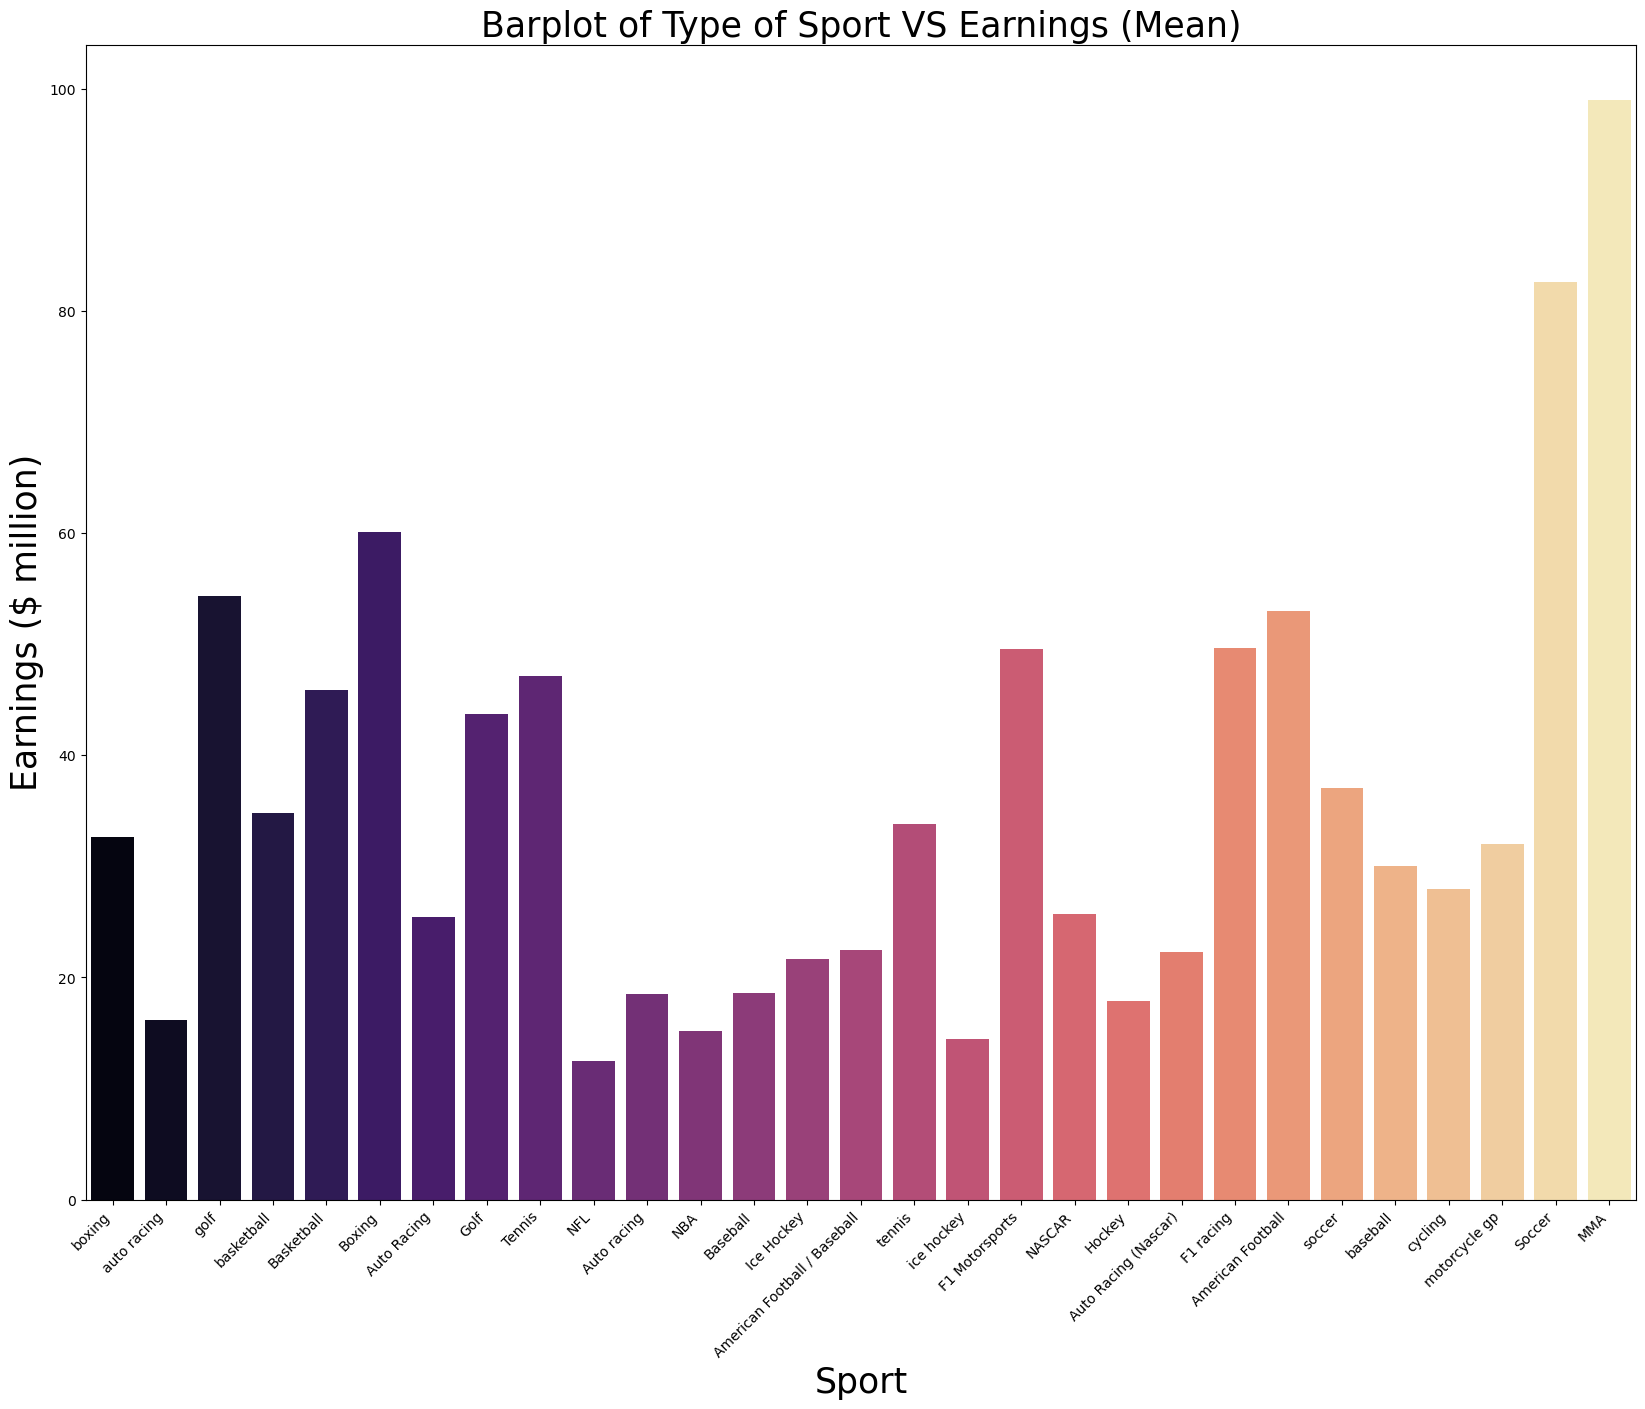

In [45]:
plt.figure(figsize=(20,15))
sns.barplot(data=dataset,x='Sport',y='earnings ($ million)',palette='magma',ci=None)
plt.xlabel("Sport",fontsize=25)
plt.ylabel("Earnings ($ million)",fontsize=25)
plt.title("Barplot of Type of Sport VS Earnings (Mean)",fontsize=25)
plt.xticks(rotation=45,ha='right')
plt.show()

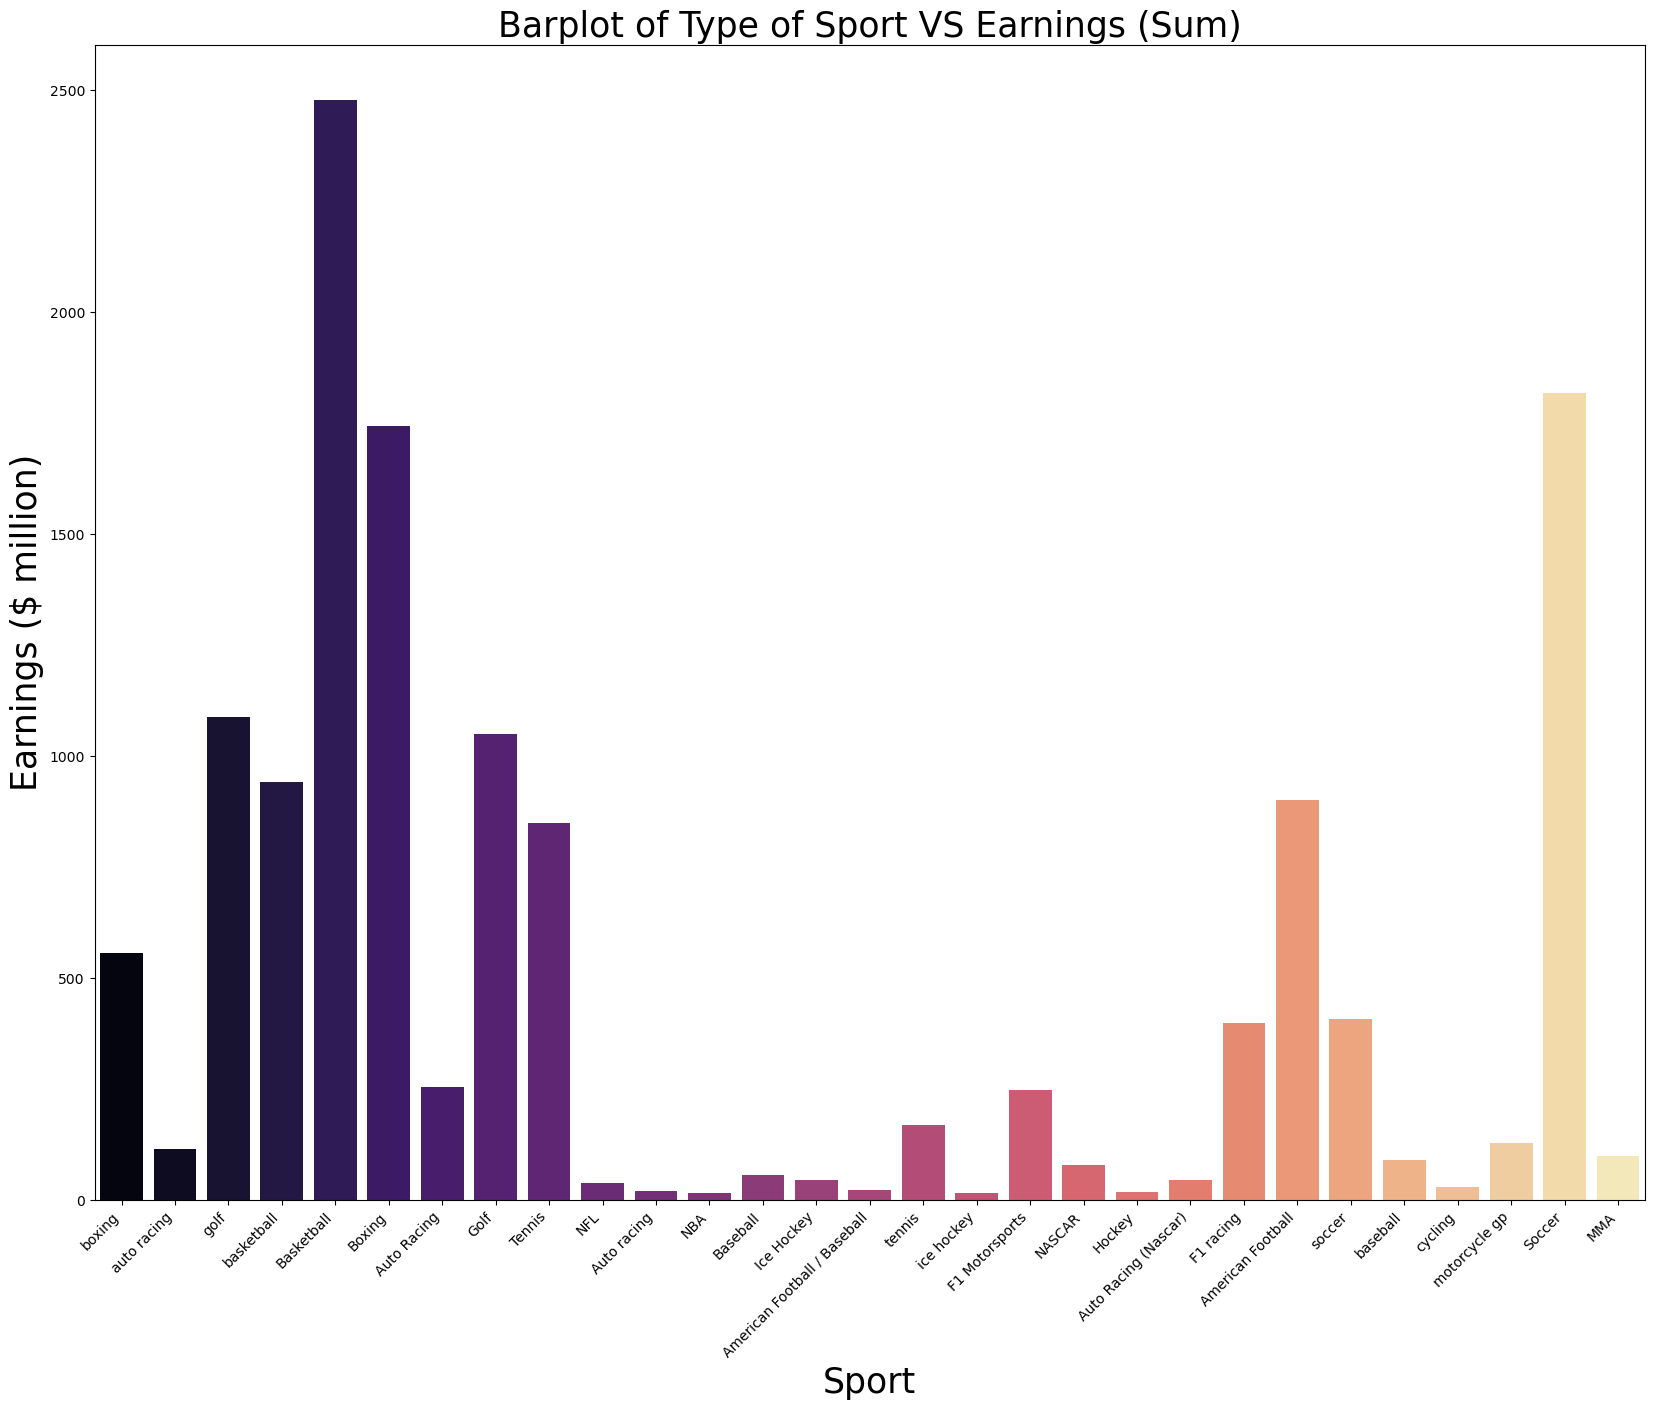

In [46]:
plt.figure(figsize=(20,15))
sns.barplot(data=dataset,x='Sport',y='earnings ($ million)',palette='magma',estimator='sum',ci=None)
plt.xlabel("Sport",fontsize=25)
plt.ylabel("Earnings ($ million)",fontsize=25)
plt.title("Barplot of Type of Sport VS Earnings (Sum)",fontsize=25)
plt.xticks(rotation=45,ha='right')
plt.show()

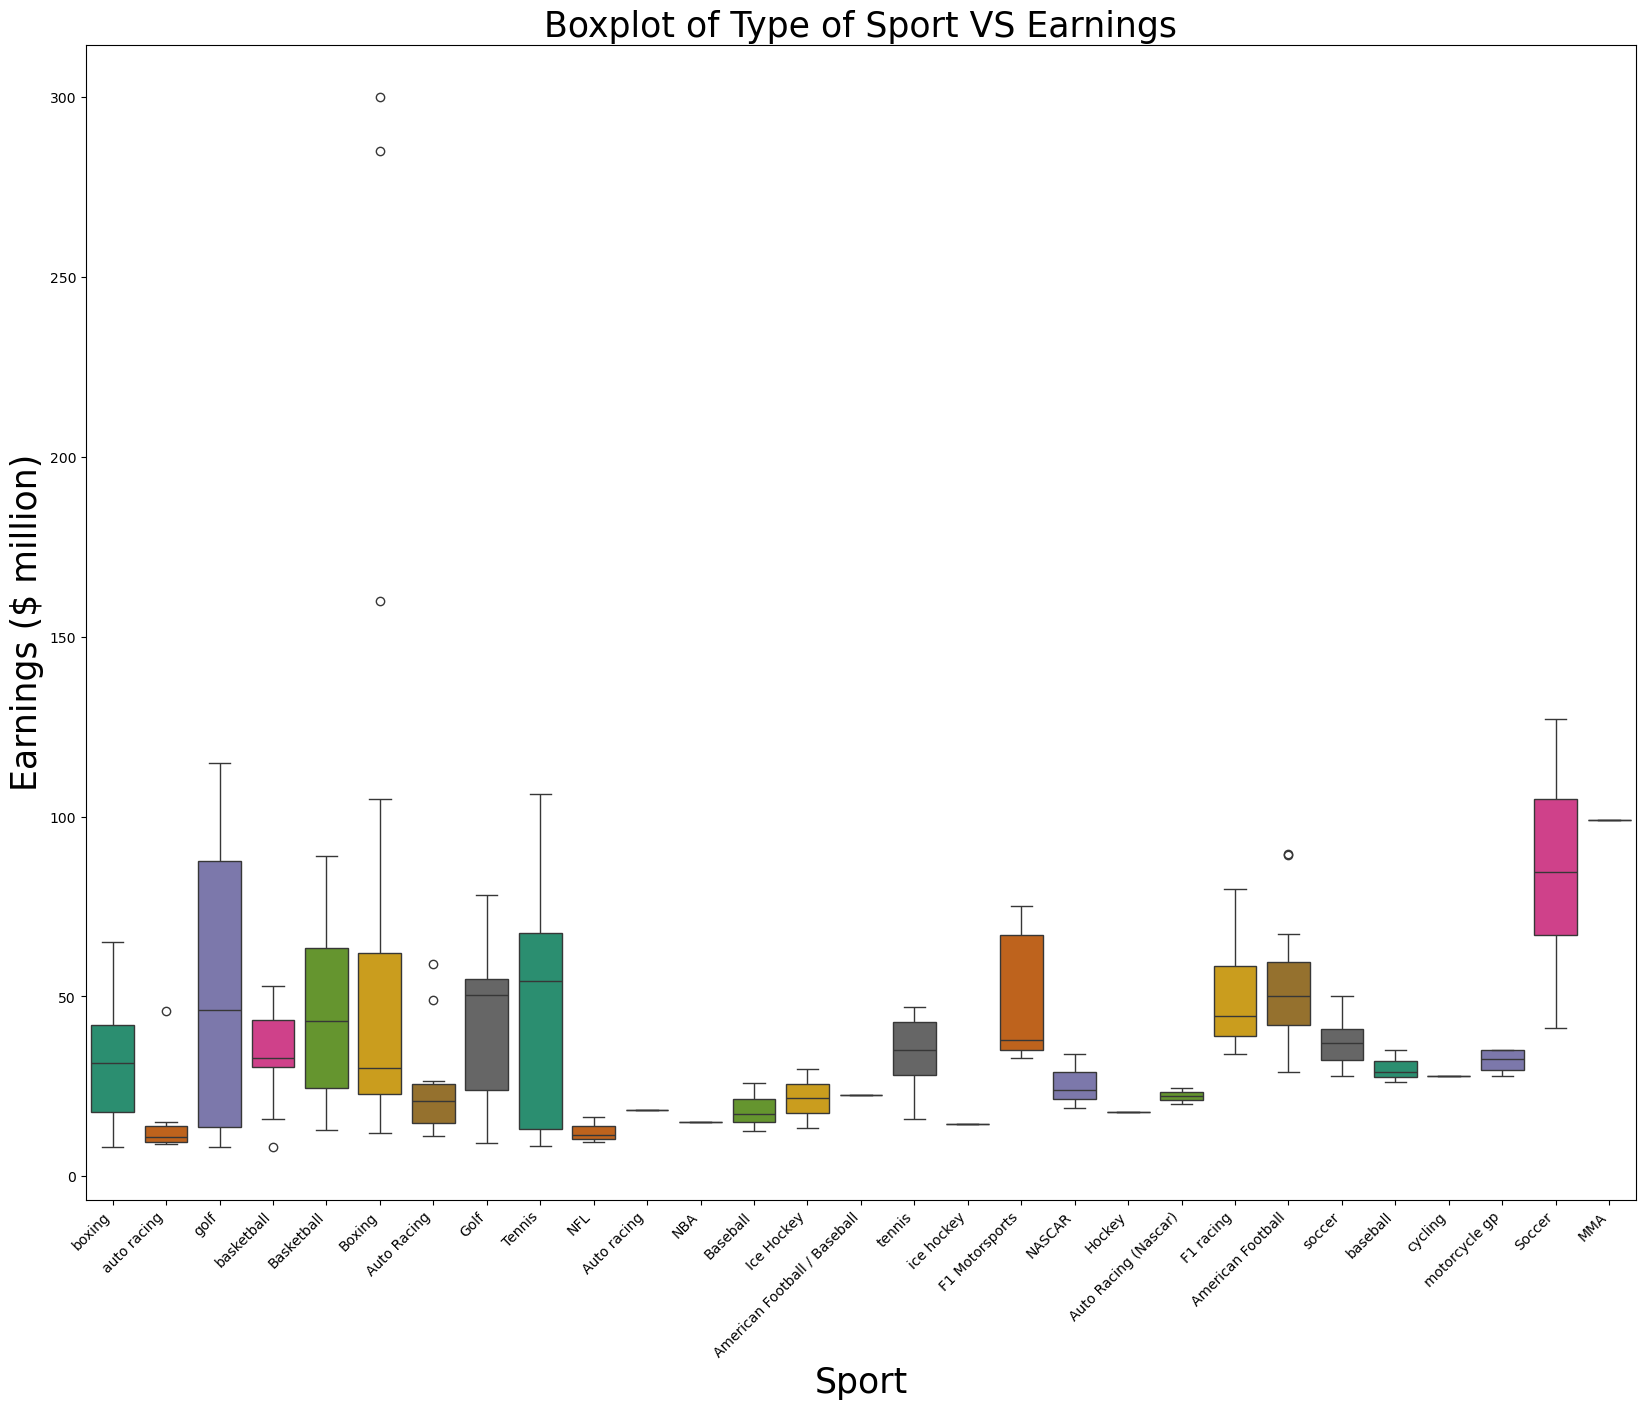

In [47]:
plt.figure(figsize=(20,15))
sns.boxplot(data=dataset,x='Sport',y='earnings ($ million)',palette='Dark2')
plt.xlabel("Sport",fontsize=25)
plt.ylabel("Earnings ($ million)",fontsize=25)
plt.title("Boxplot of Type of Sport VS Earnings",fontsize=25)
plt.xticks(rotation=45,ha='right')
plt.show()

#### Observation:
#####
#### From First Barplot:(Based on average earnings)
####   It  shows that  average earnings  of MMA player   is highest although Basketball  was played by most of the players in univariate analysis, and MMA players were very few.
####  After MMA , average earnings of Soccer player is high.
#### Average income of NFL player is the lowest .
#### 
#### From Second Barplot(estimator=sum)
#### It shows that total sum of earnings(of all basketball players) is highest for  basketball players .It maybe because many players play basketball.
#### Total sum of earnings for soccer beats boxing .
#### Total sum of earnings for MMA players is low although avergae earning is highest.
#### Hence , from both barplots , earnings of soccer players seems pretty amazing since   mean earnings as well as total sum of earnings(of all players) takes secondmost position.
#####
#### From the Boxplot:
#### Some of the Players involved in Boxing earn a very huge sum of money than the players engaged in other sports. Hence, if a player is professional in Boxing , he/she earns well.
    
        

#### Lets do hypothesis testing to see if Earnings is related with Type of Sports.
####
#### Null hypothesis(Ho):Type of Sports and Earnings have no relation.
#### Alternate Hypothesis(H1):Types of Sports distinguishes Earnings.

In [48]:
from scipy.stats import f_oneway

sports = dataset['Sport']
earnings = dataset['earnings ($ million)']

earnings_by_sport = {}
for sport, earning in zip(sports, earnings):
    if sport in earnings_by_sport:
        earnings_by_sport[sport].append(earning)
    else:
        earnings_by_sport[sport] = [earning]

f_statistic, p_value = f_oneway(*earnings_by_sport.values())

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 2.729503785766521
p-value: 1.5951684769676587e-05


In [49]:
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There are significant differences in earnings across different sports.")
else:
    print("Fail to reject null hypothesis: No significant differences in earnings across different sports.")


Reject null hypothesis: There are significant differences in earnings across different sports.


#### Final Conclusion:
#####
#### From one way ANOVA test we came to conclude that type of sport does matter earnings.

#####
#### <h10>5.2.4) Nationality VS Earnings</h10>

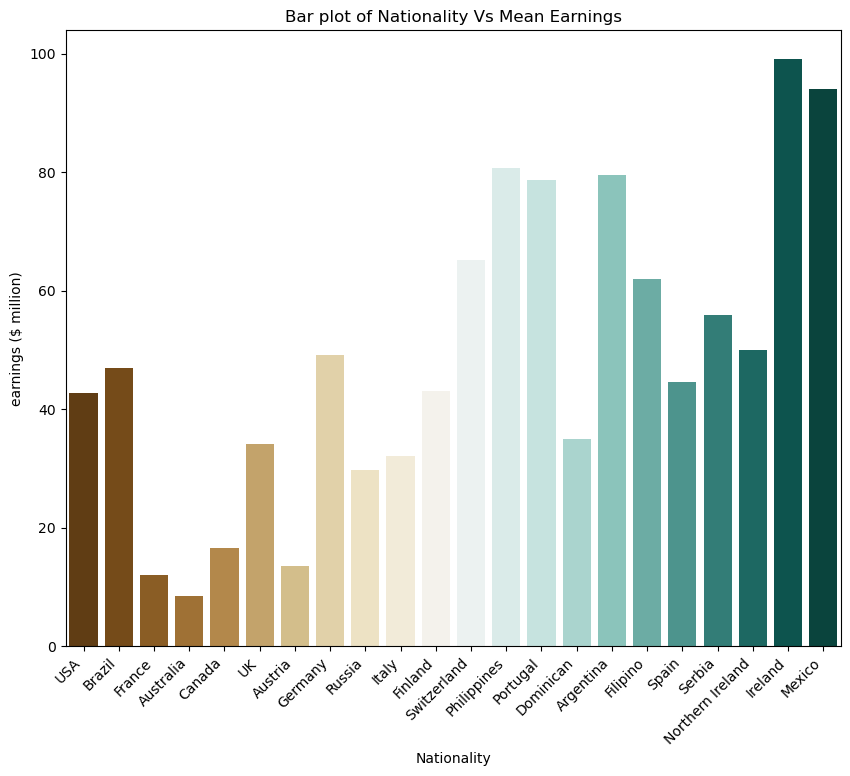

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(data=dataset,x='Nationality',y='earnings ($ million)',palette='BrBG',ci=None)
plt.xticks(rotation=45,ha='right')
plt.title('Bar plot of Nationality Vs Mean Earnings')
plt.show()

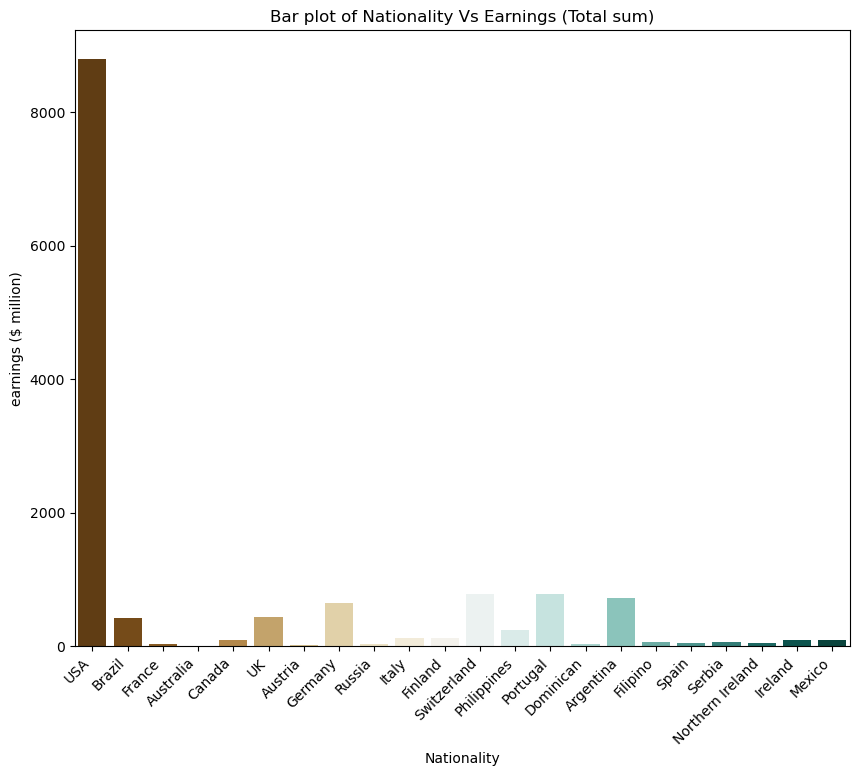

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(data=dataset,x='Nationality',y='earnings ($ million)',palette='BrBG',estimator='sum',ci=None)
plt.xticks(rotation=45,ha='right')
plt.title('Bar plot of Nationality Vs Earnings (Total sum)')
plt.show()

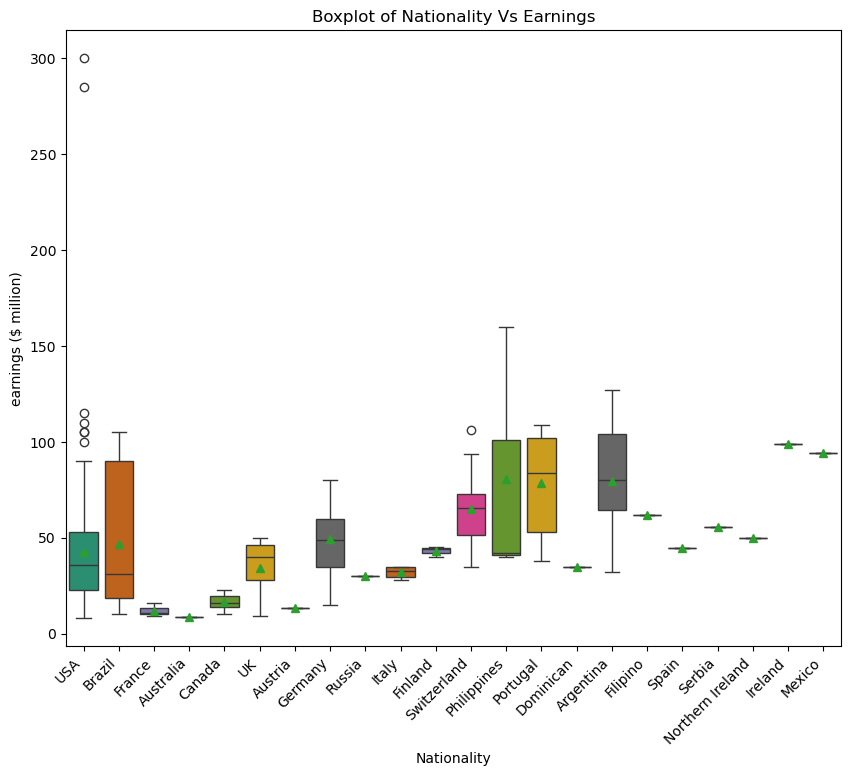

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dataset,x='Nationality',y='earnings ($ million)',palette='Dark2',showmeans=True)
plt.xticks(rotation=45,ha='right')
plt.title('Boxplot of Nationality Vs Earnings')
plt.show()

#### Observation:
#####

#### From First Barplot:(Based on average earning)
#### It  shows that  average earnings  of players from Ireland is high although many 
#### players are from the USA and very few from Ireland.
#### Average earnings of players from Australia is the lowest.
####
#### From Second Barplot(estimator=sum)
#### It shows that total sum of earnings is highest for players from the USA .
#### It maybe because many players are from the USA .
#####
#### From the Boxplot:
#### Some of the Players from the USA earn a very huge sum of money(~300 $ million ) than the players from other countries.

#### Lets do hypothesis testing to see if Earnings is related with nationality.
#####
#### Null hypothesis(Ho):Type of Sports and Earnings have no relation.
#### Alternate Hypothesis(H1):Types of Sports distinguishes Earnings.

In [53]:
nationality = dataset['Nationality']
earnings = dataset['earnings ($ million)']

earnings_by_nationality = {}
for nat, earning in zip(nationality, earnings):
    if nat in earnings_by_nationality:
        earnings_by_nationality[nat].append(earning)
    else:
        earnings_by_nationality[nat] = [earning]

f_statistic, p_value = f_oneway(*earnings_by_nationality.values())

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 2.3578307948752584
p-value: 0.0009103051652708946


In [54]:
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There are significant differences in earnings across different nationalities.")
else:
    print("Fail to reject null hypothesis: No significant differences in earnings across different nationalities.")


Reject null hypothesis: There are significant differences in earnings across different nationalities.


#### Final Conclusion:
#####
#### From statistical analysis using one way ANOVA test we can say that:
#### Nationality is a good feature to determine earnings of players
    

#####
#### <h10>5.2.5) Year VS Earnings</h10>

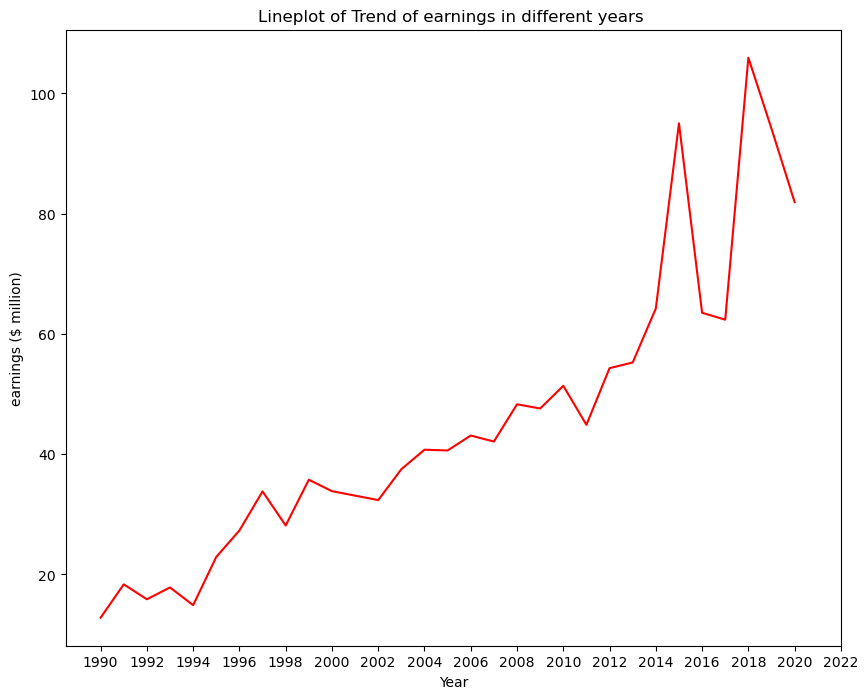

In [55]:
plt.figure(figsize=(10,8))
sns.lineplot(data=dataset,x='Year',y='earnings ($ million)',ci=None,color='red')
plt.title('Lineplot of Trend of earnings in different years ')
plt.xticks(np.arange(1990,2024,2))
plt.show()

#### From above lineplot:
#####
##### It shows that the earnings of players have been increased along different years although sometimes the patterns have shrink. Total Earnings from all players in 2019 seems highest .

In [56]:
year = dataset['Year']
earnings = dataset['earnings ($ million)']

earnings_by_year = {}
for year, earning in zip(year, earnings):
    if year in earnings_by_year:
        earnings_by_year[year].append(earning)
    else:
        earnings_by_year[year] = [earning]

f_statistic, p_value = f_oneway(*earnings_by_year.values())

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 9.722668169473874
p-value: 7.045213596259916e-28


In [57]:
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant relationship between year and earnings.")
else:
    print("Fail to reject null hypothesis: No significant relationship between year and earnings.")

Reject null hypothesis: There is a significant relationship between year and earnings.


Final Conclusion:
    
    From statistical analysis using one way ANOVA test we can say that:
    Year is a good feature to determine earnings of players.
    

####
#### <font color='white'>5.3) MULTI-VARIATE ANALYSIS</font>

#####
#### <h10>5.3.1) Correlation Matrix</h10>

In [58]:
dataset.drop('S.NO',axis=1,inplace=True)

In [59]:
corr_matrix=dataset.corr(numeric_only=True)
corr_matrix

Current Rank  Previous Year Rank      Year  \
Current Rank              1.000000            0.299189  0.001600   
Previous Year Rank        0.299189            1.000000  0.065681   
Year                      0.001600            0.065681  1.000000   
earnings ($ million)     -0.449052            0.023437  0.653866   

                      earnings ($ million)  
Current Rank                     -0.449052  
Previous Year Rank                0.023437  
Year                              0.653866  
earnings ($ million)              1.000000

In [60]:
corr_matrix['earnings ($ million)']

Current Rank           -0.449052
Previous Year Rank      0.023437
Year                    0.653866
earnings ($ million)    1.000000
Name: earnings ($ million), dtype: float64

Text(0.5, 1.0, 'Heatmap of Numerical variables')

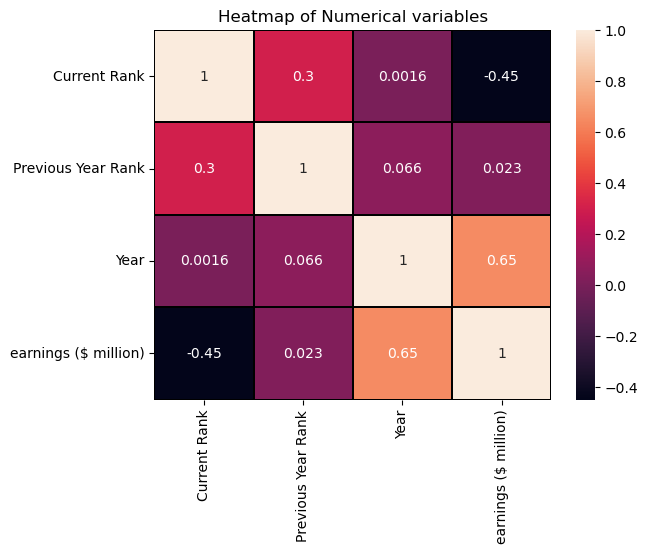

In [61]:
sns.heatmap(data=corr_matrix,annot=True,linewidths=0.2,linecolor='black')
plt.title('Heatmap of Numerical variables')

#### Observations:

#### Current Rank and earnings have negative correlation and hence,as the rank increases to higher values, earnings of players decreases and this is True.
#### Previous Year Rank and earnings have weak negative correlation .
#### Year and earnings have a good correlation .It means as the year value increases the earnings of players get high.

#### 
#### <h10>5.3.2) Relation between Year, Earnings and Current Rank</h10>

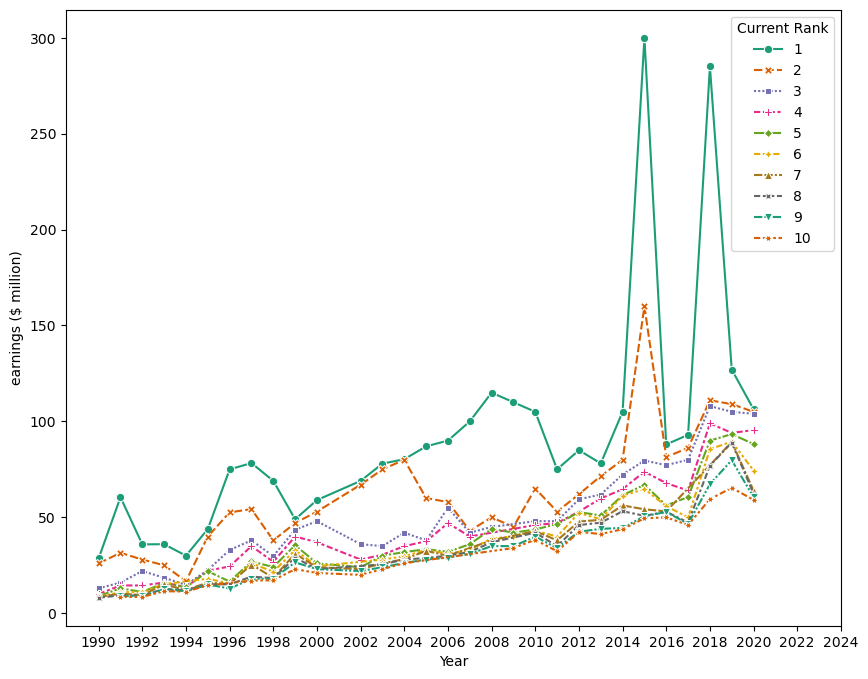

In [62]:
plt.figure(figsize=(10,8))
sns.lineplot(data=dataset,x='Year',y='earnings ($ million)',hue='Current Rank',palette='Dark2',markers=True,style='Current Rank')
plt.xticks(np.arange(1990,2025,2));

#### Observations:
#### 
#### From the lineplot between Year, Earnings, and Current Rank it shows that for all  the Current Ranks (1-10), with the increase in year , earnings have also increased for all ranks; however sometimes the earnigns have gone down as well.

######
# <font color='pink'>6)FINAL CONCLUSION</font>

##### 1.Players having Current Rank of 1 are always earning more than those of other Ranks.
#### 2.All the players at present(2020) except for the players with current rank 4 seems to have earned less than they earned in previous year.
#### 3.Some of the Top players of Boxing are earning approximately 290-300 million dollor which is very huge income.

####
ATTRIBUTES AFFECTING THE TARGET FEATURE:

#####
#### <font color='orange'>1)Current Rank</font>
####  <font color='orange'>2)Year</font>
#### <font color='orange'>3)Nationality</font>
#### <font color='orange'>4)Sport</font>

##### 
### CURIOUS ABOUT PLAYERS WHO EARNS HOW MUCH AND PER YEAR EARNINGS IN THIS DATASET?

In [63]:
highest_earner = dataset.groupby('Name')['earnings ($ million)'].sum().reset_index()
highest_earner = highest_earner.sort_values(by='earnings ($ million)', ascending=False)

In [64]:
highest_earner

Name  earnings ($ million)
78              Tiger Woods                1373.8
45             LeBron James                 844.8
25         Floyd Mayweather                 840.0
14        Cristiano Ronaldo                 787.1
68            Roger Federer                 781.1
..                      ...                   ...
12            Cecil Fielder                  12.7
53           Michael Moorer                  12.1
20  Donovan "Razor" Ruddock                  10.2
30              Greg Norman                   8.5
57             Monica Seles                   8.5

[82 rows x 2 columns]

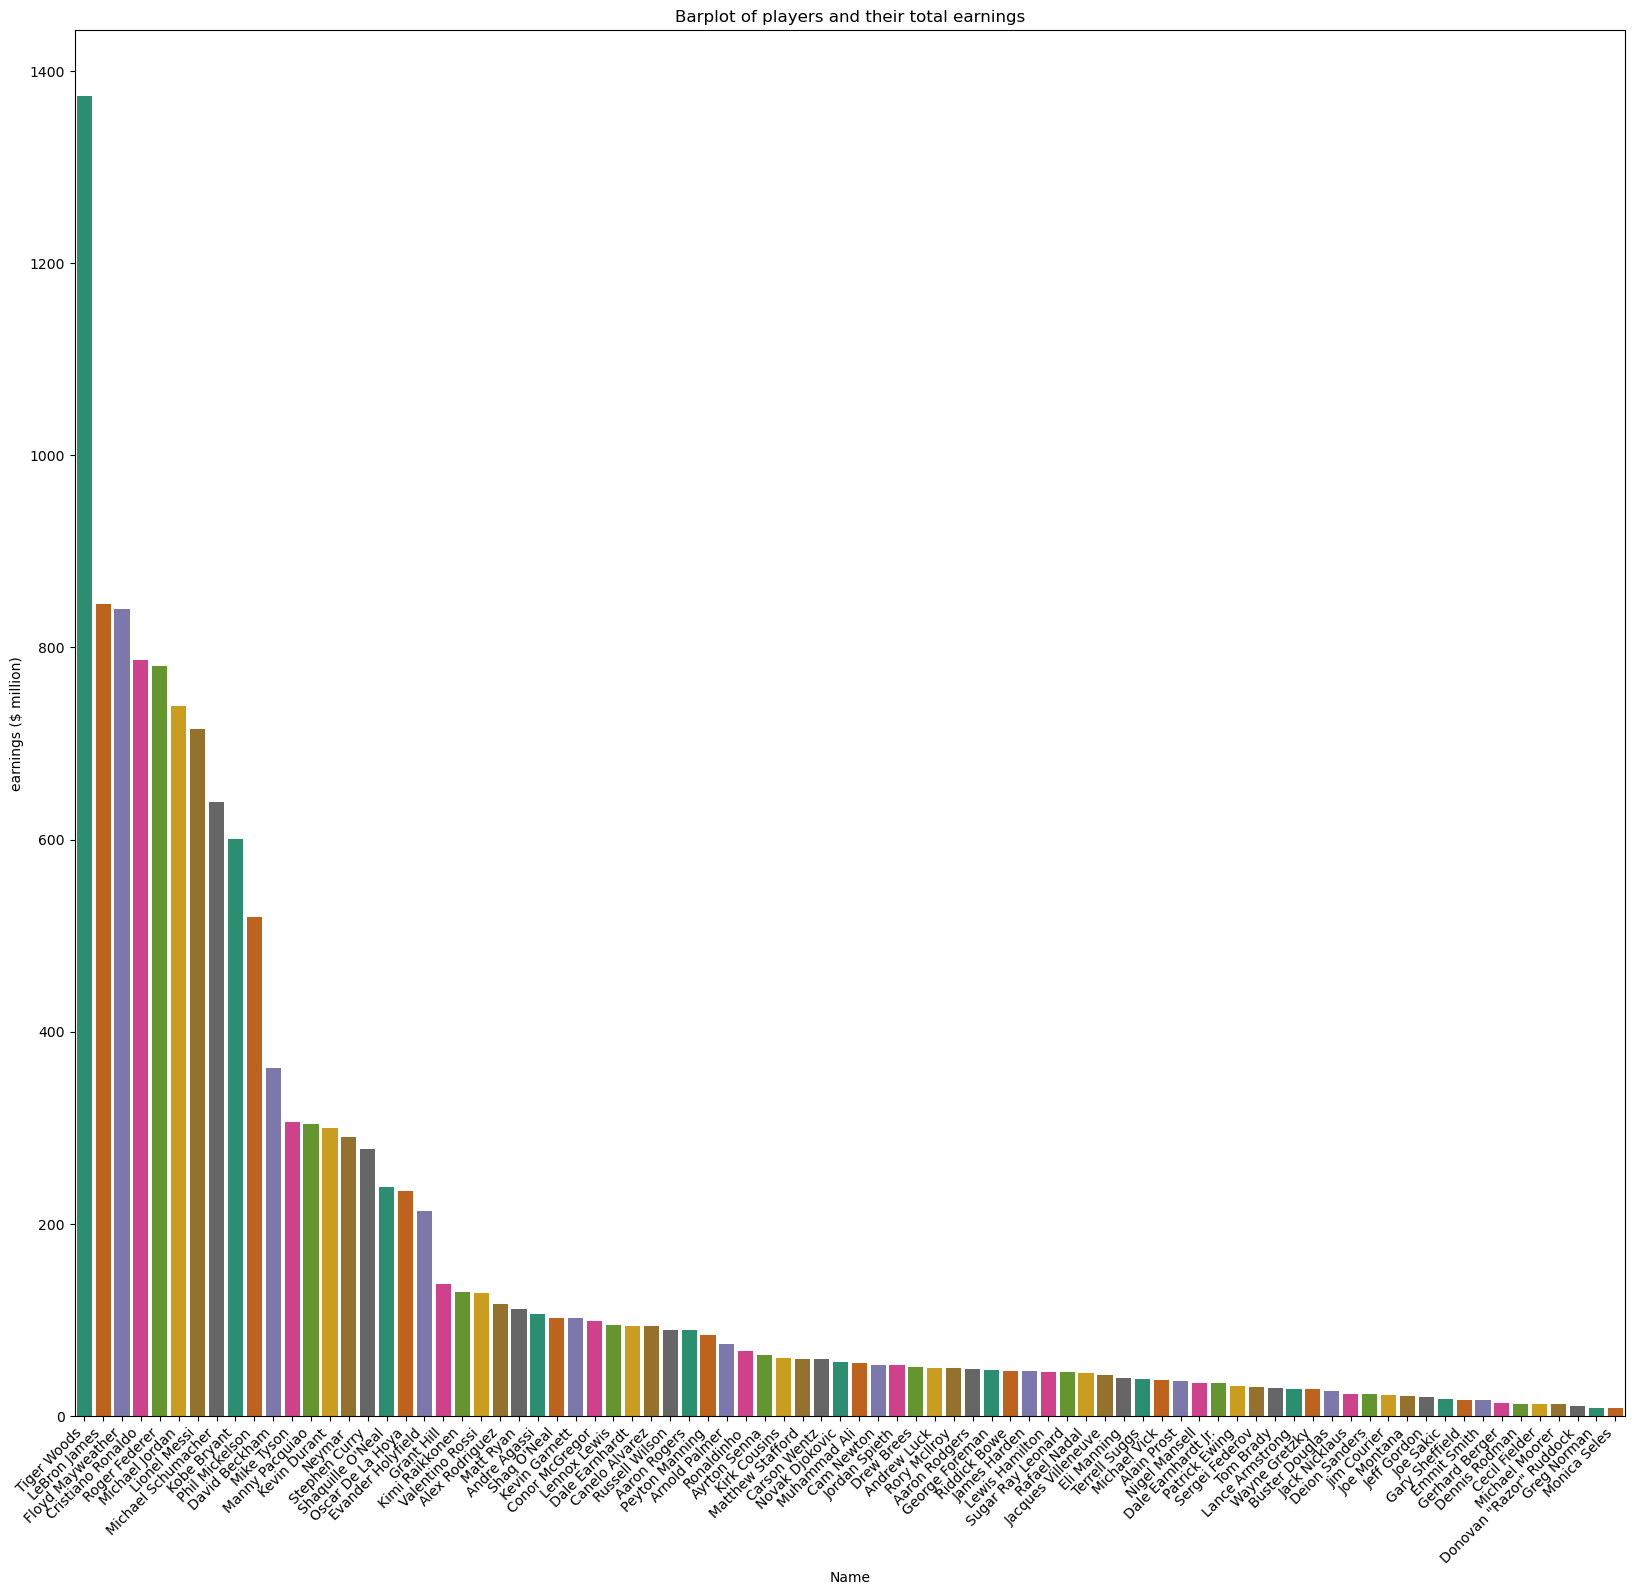

In [65]:
plt.figure(figsize=(20,18))
sns.barplot(data=highest_earner,x='Name',y='earnings ($ million)',palette='Dark2')
plt.title('Barplot of players and their total earnings')
plt.xticks(rotation=45,ha='right');
plt.show()

#### Tiger Woods is the richest player till now among all the players 

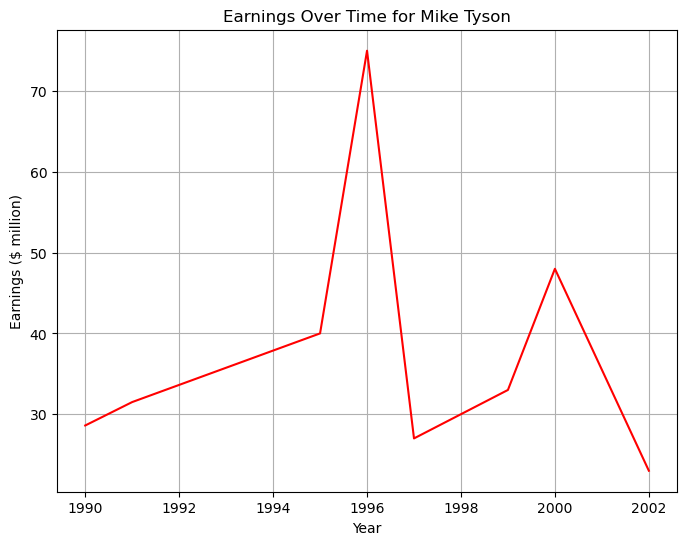

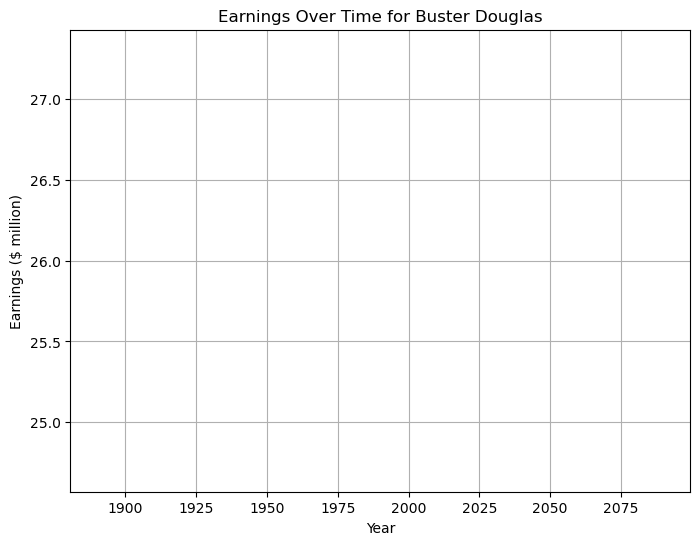

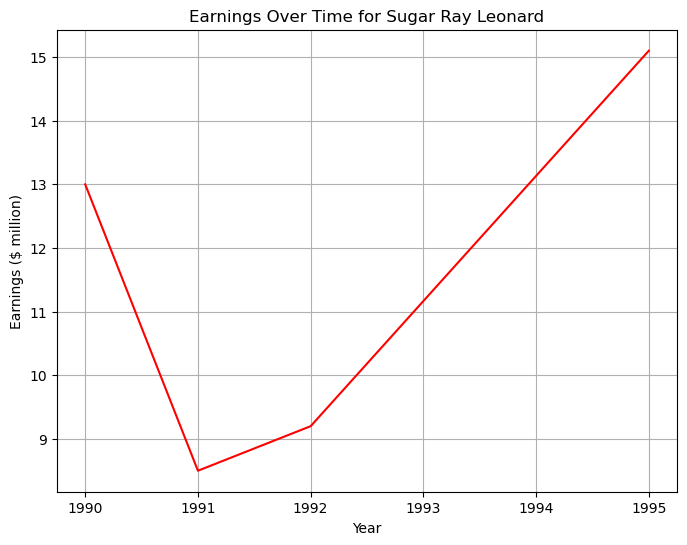

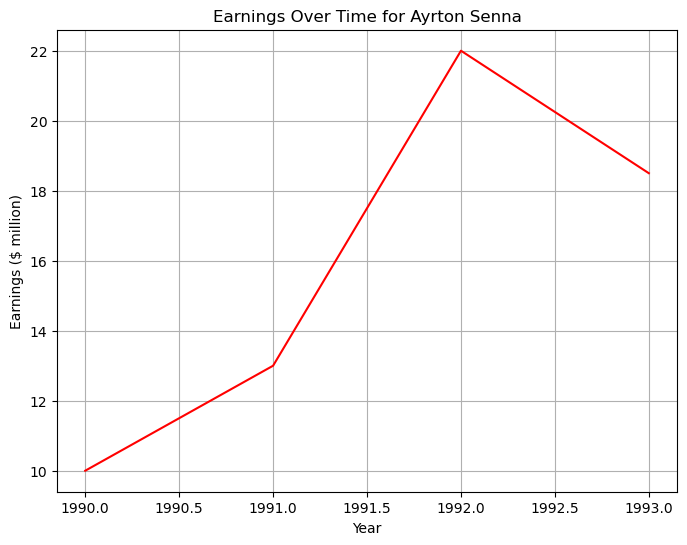

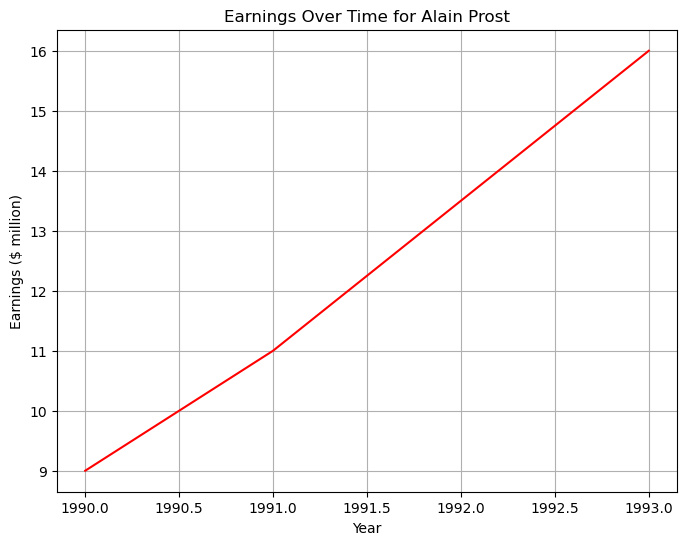

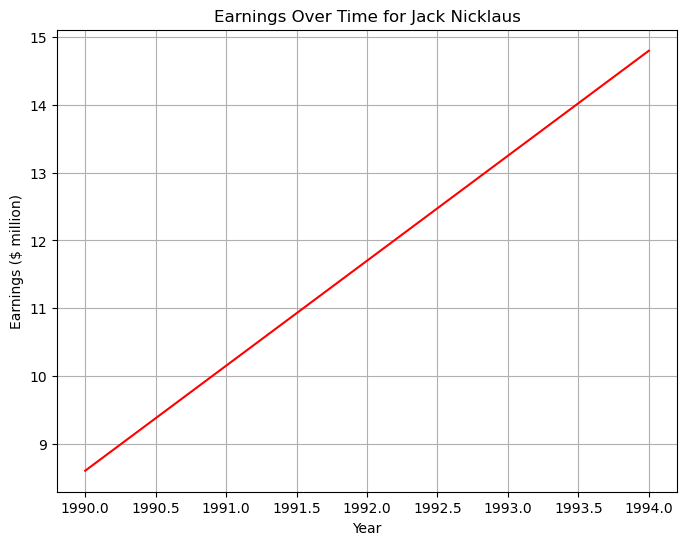

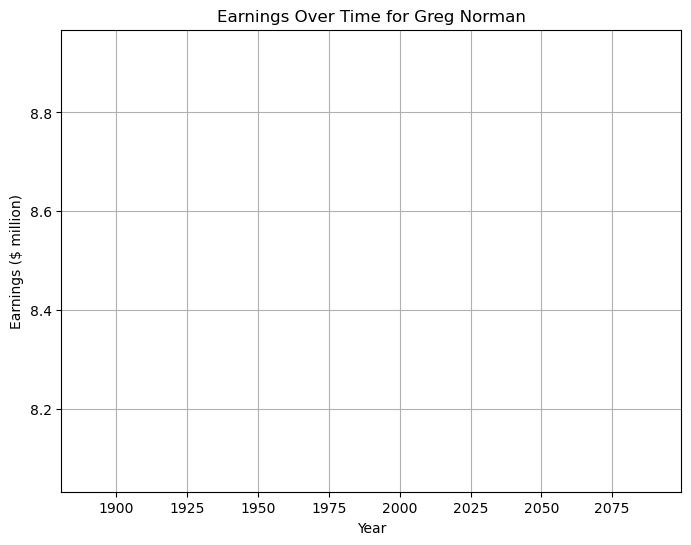

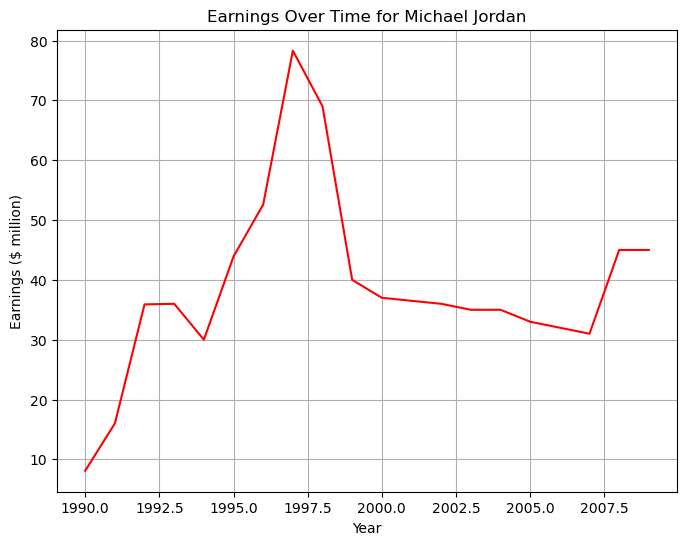

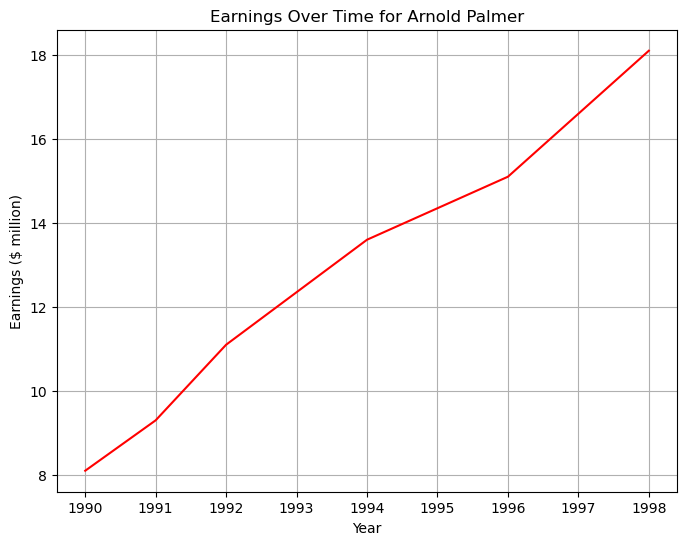

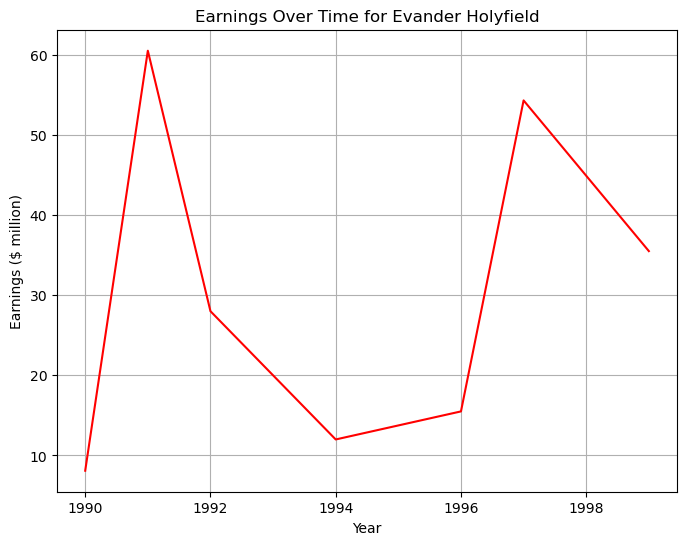

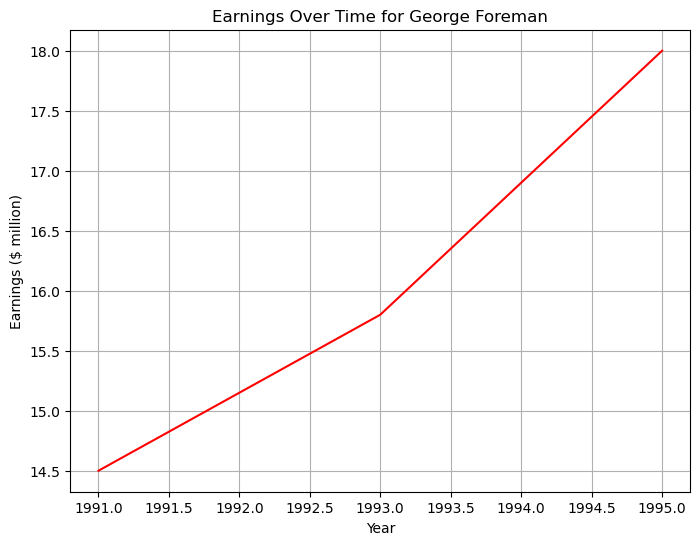

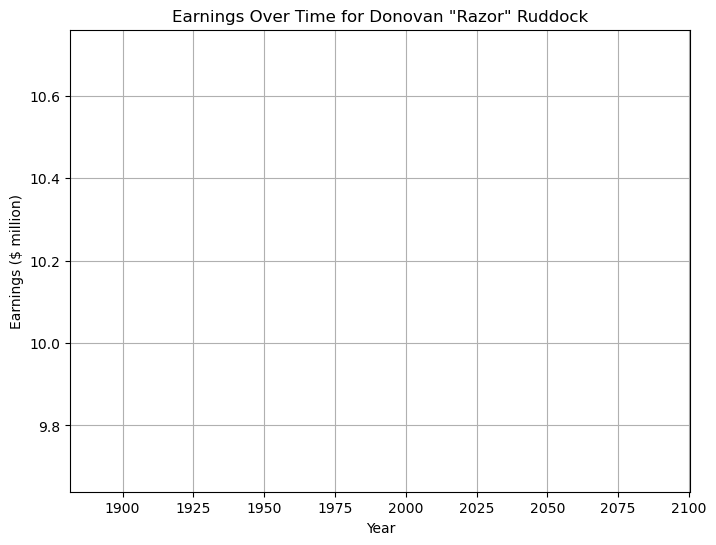

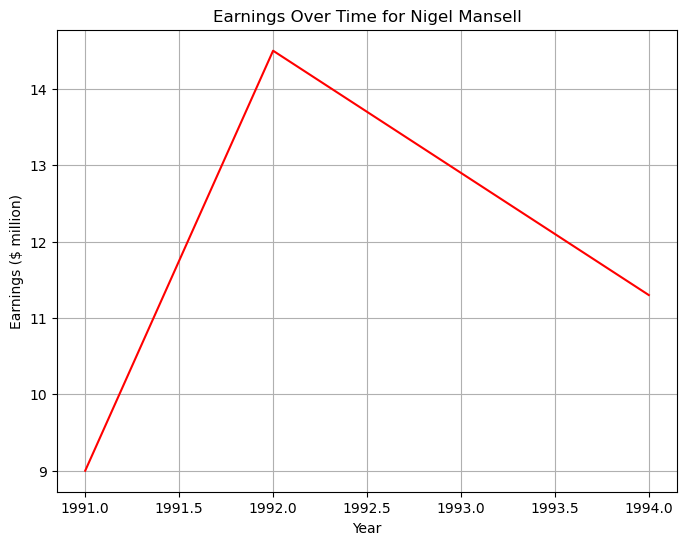

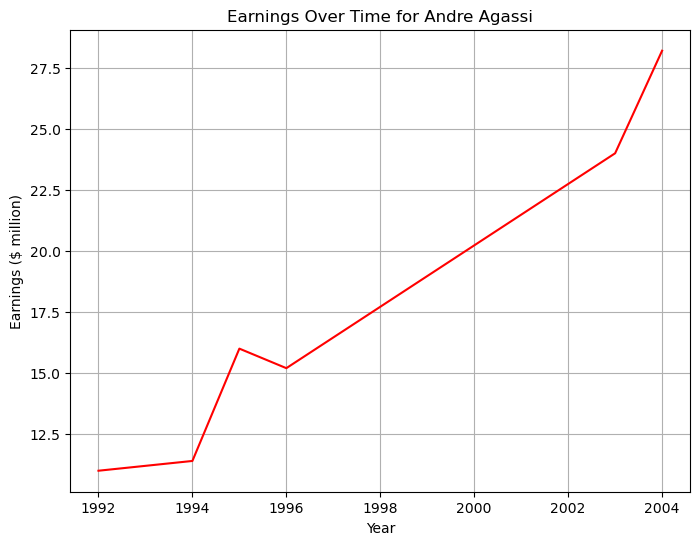

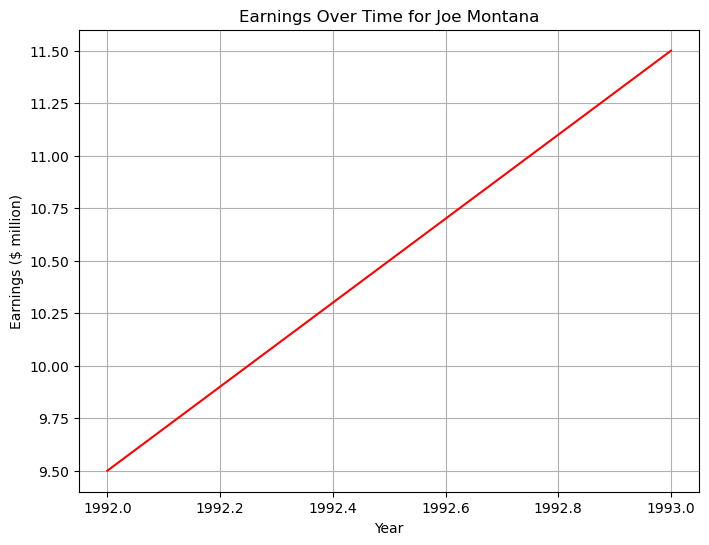

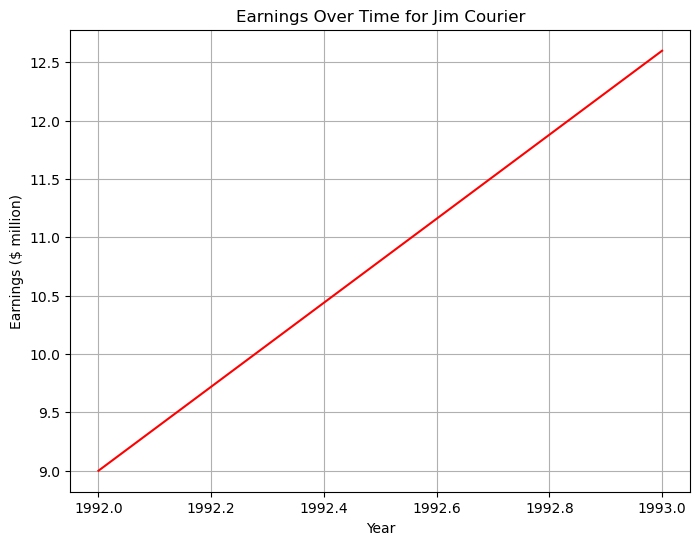

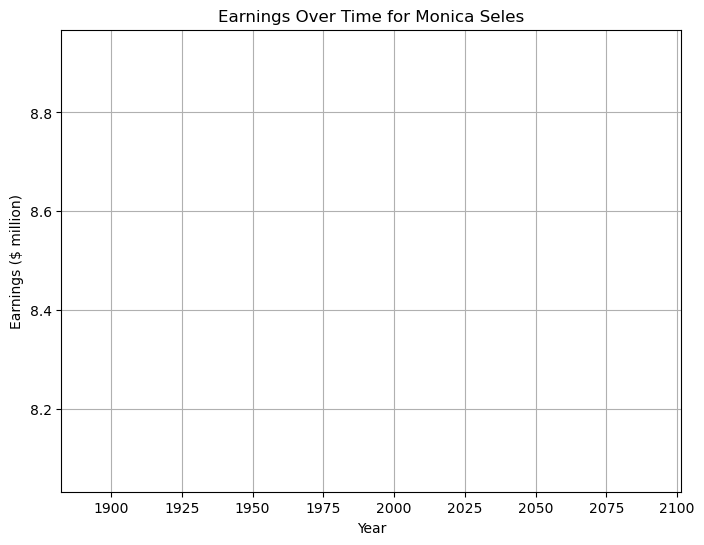

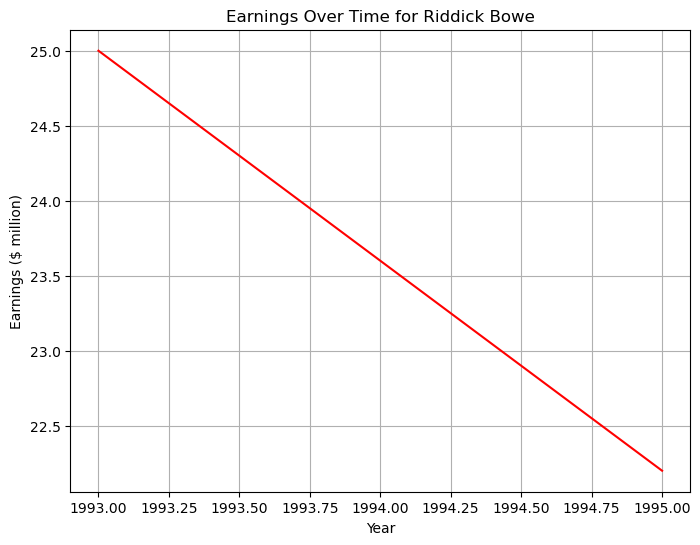

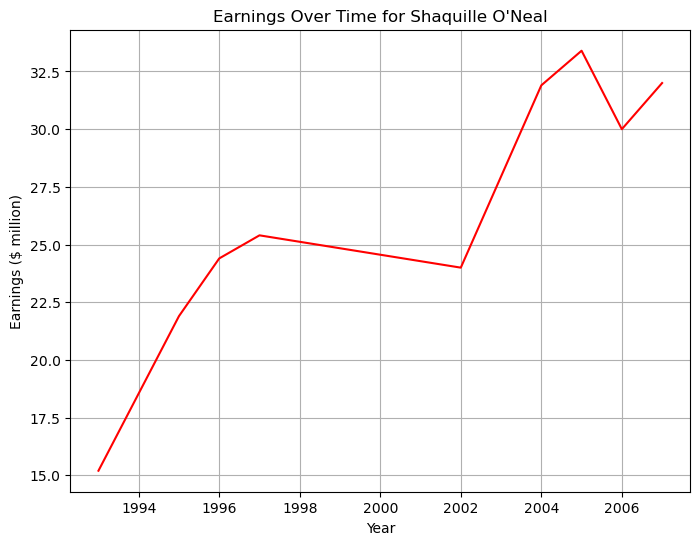

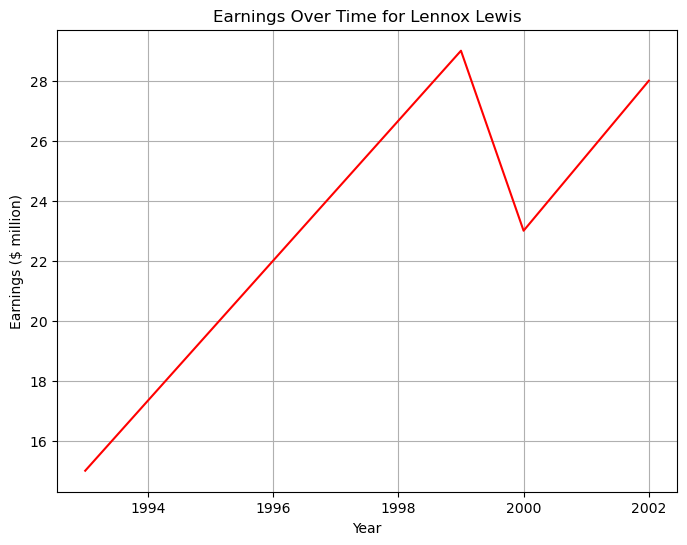

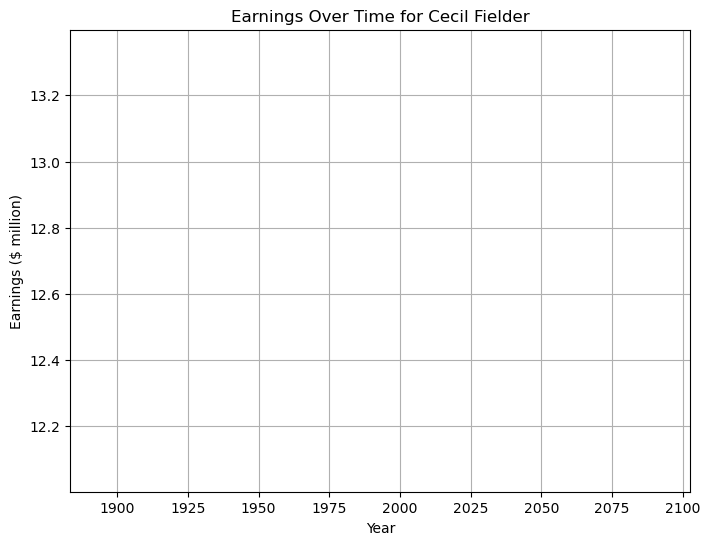

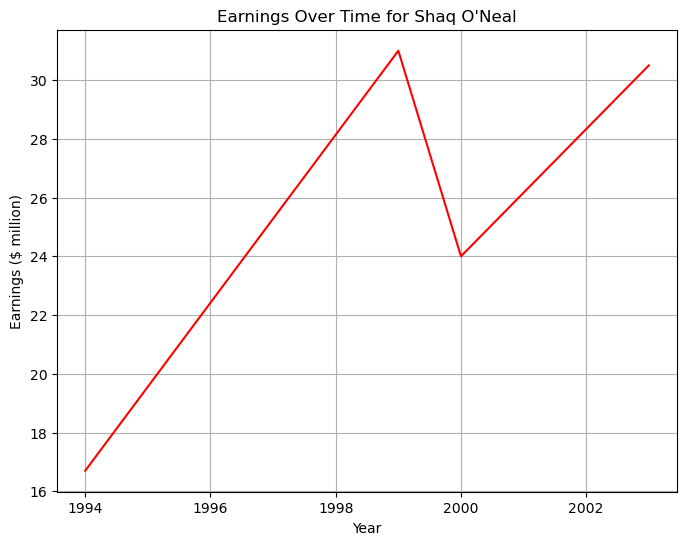

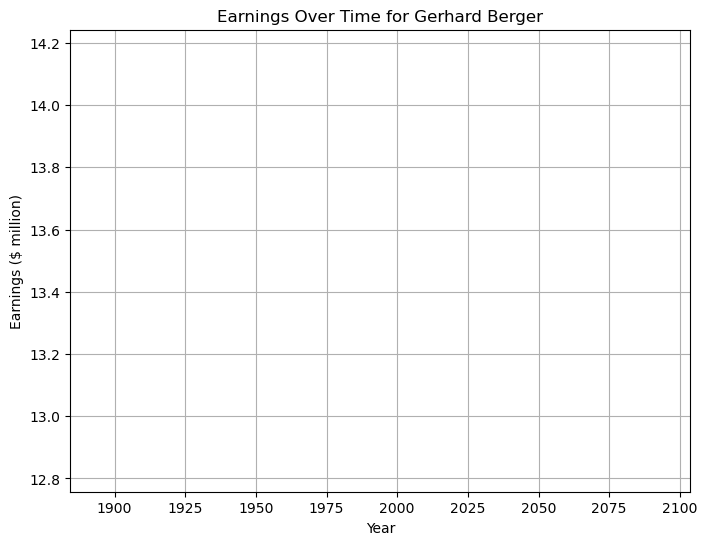

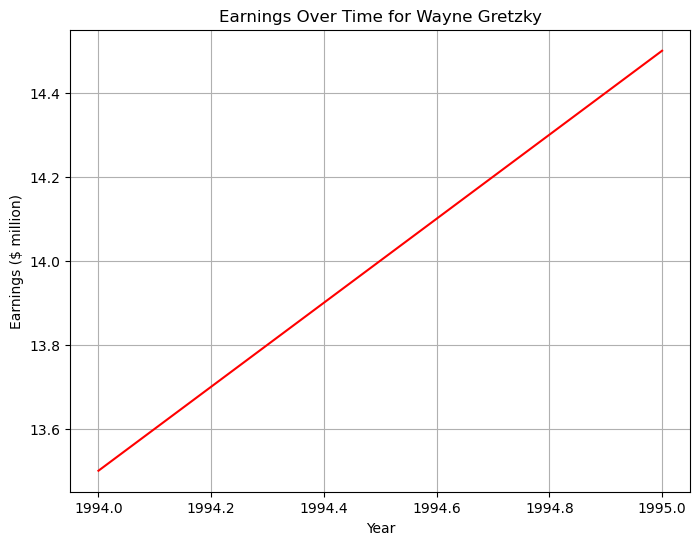

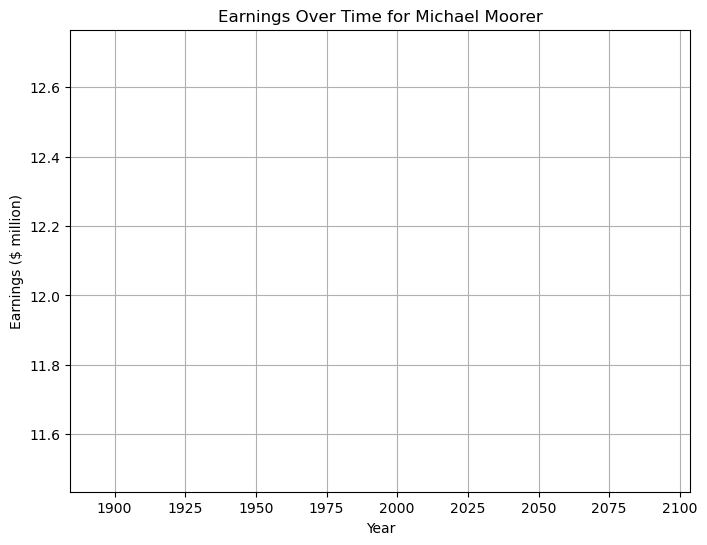

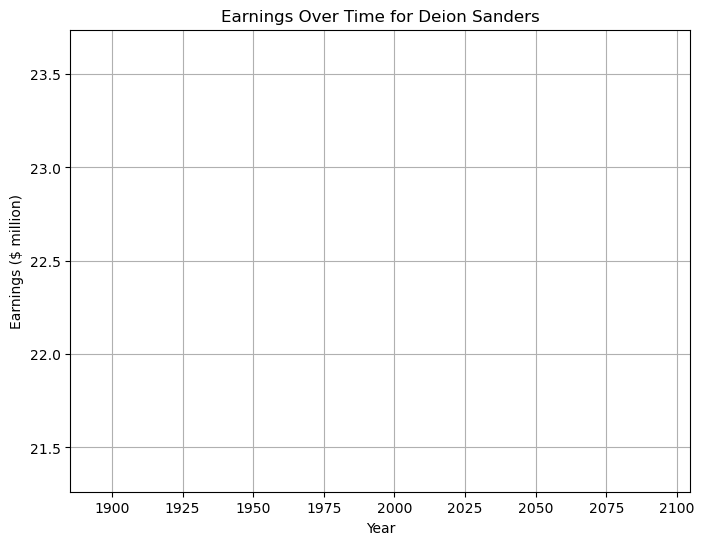

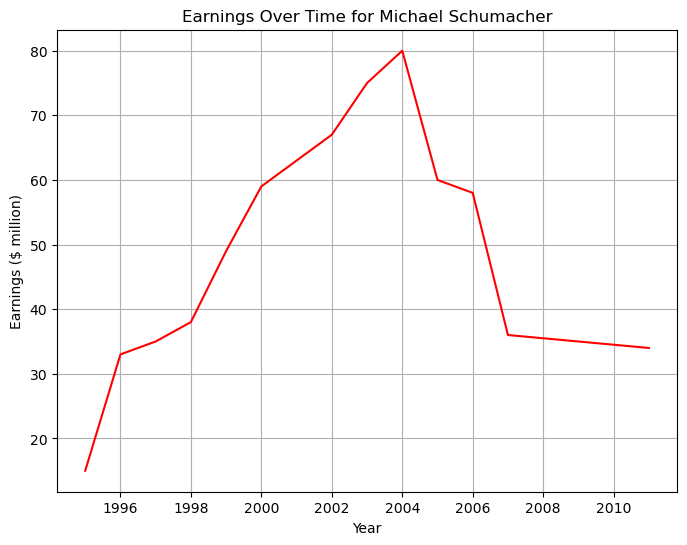

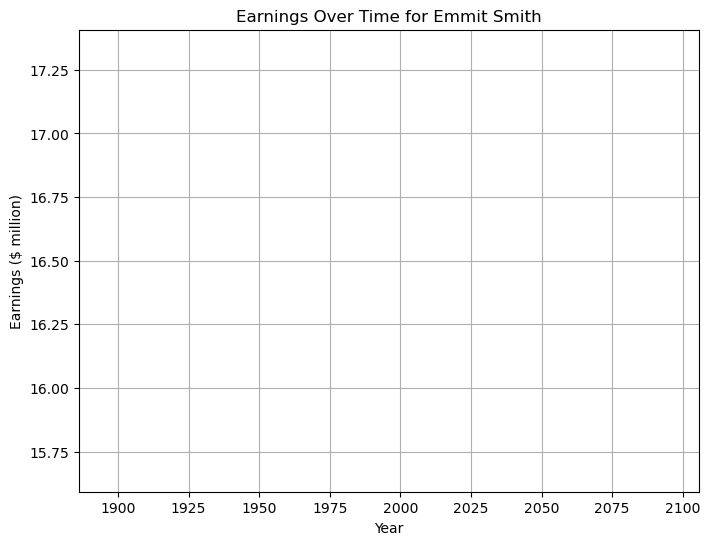

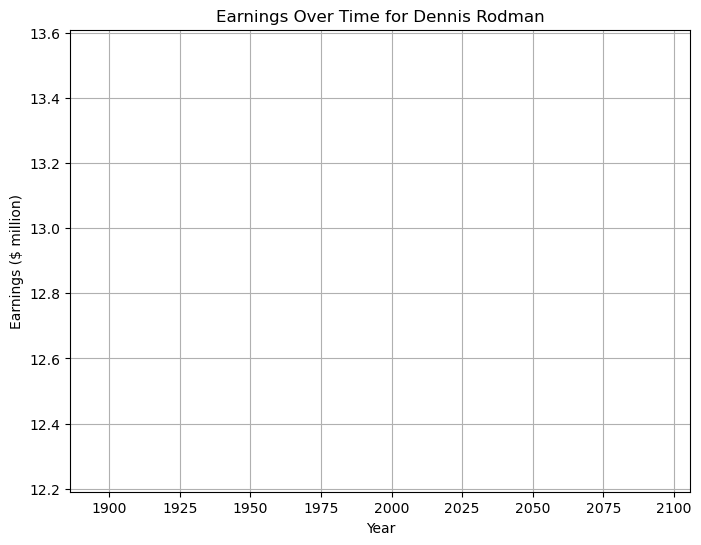

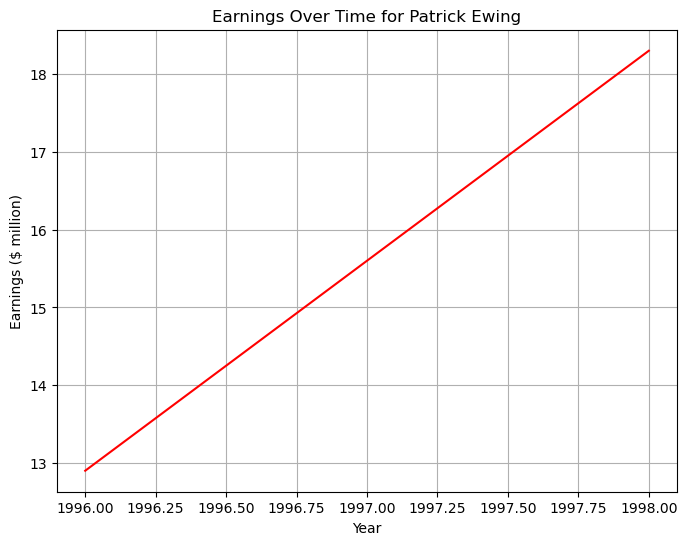

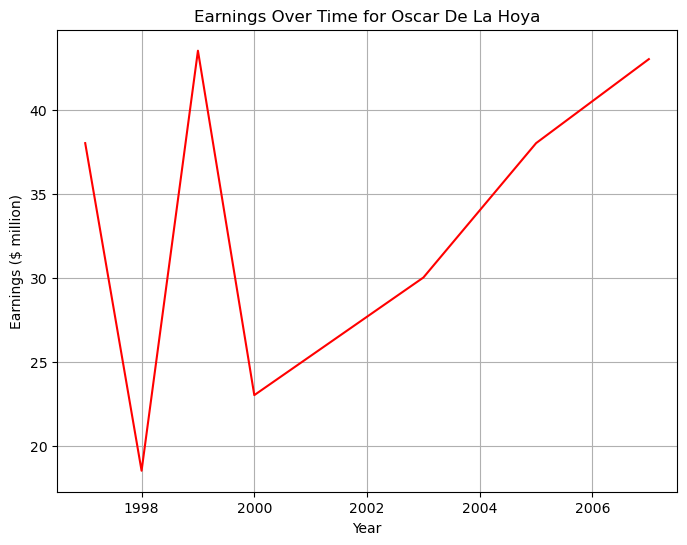

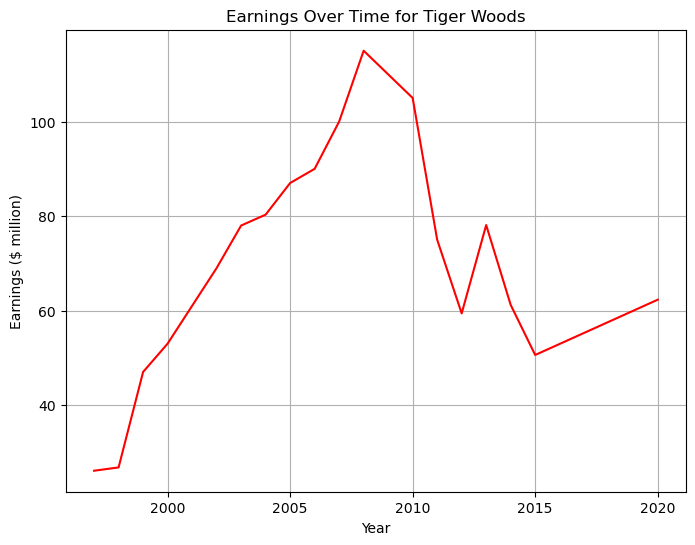

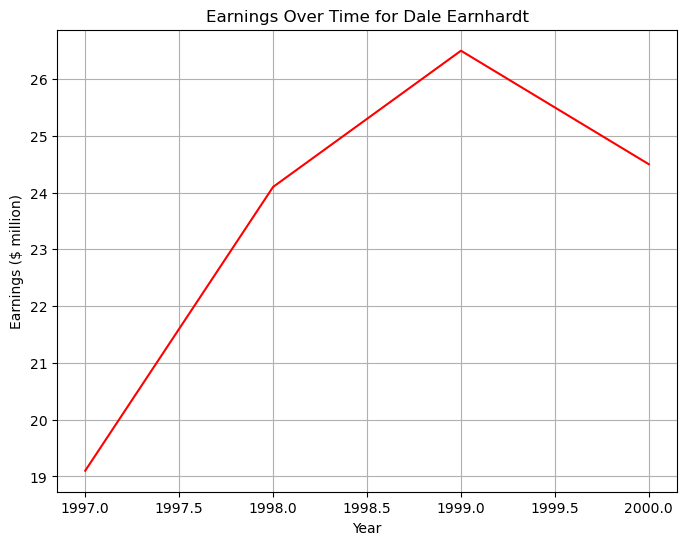

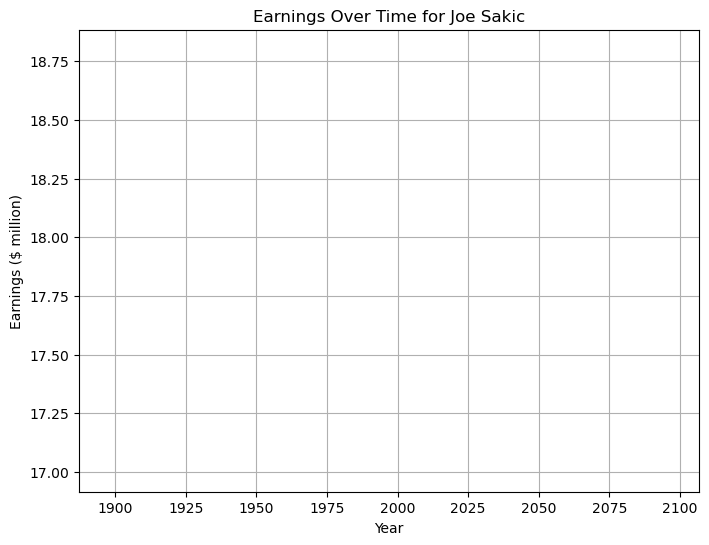

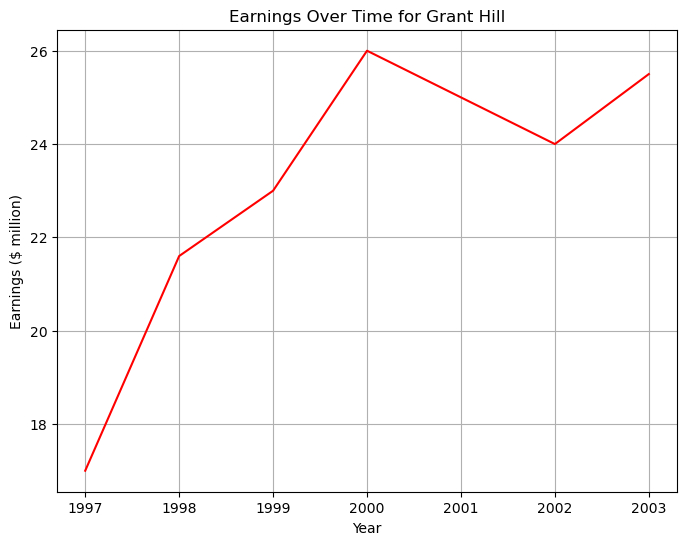

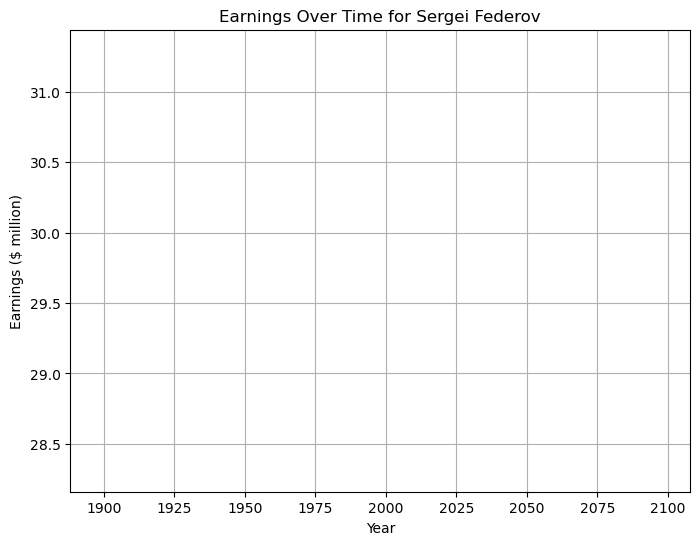

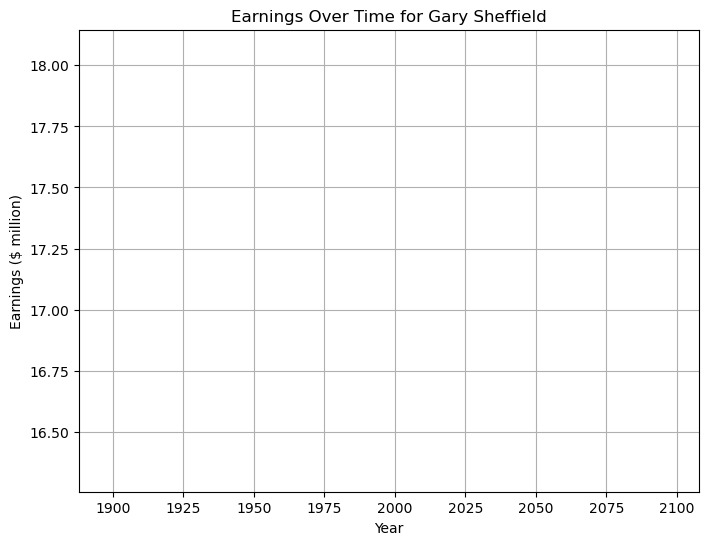

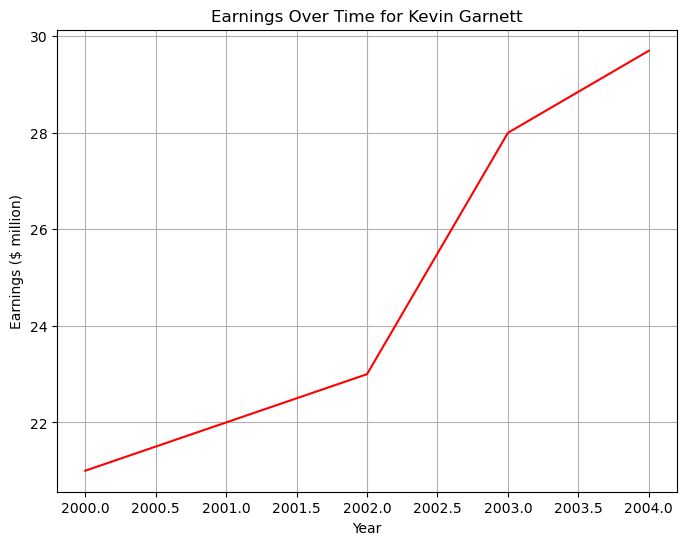

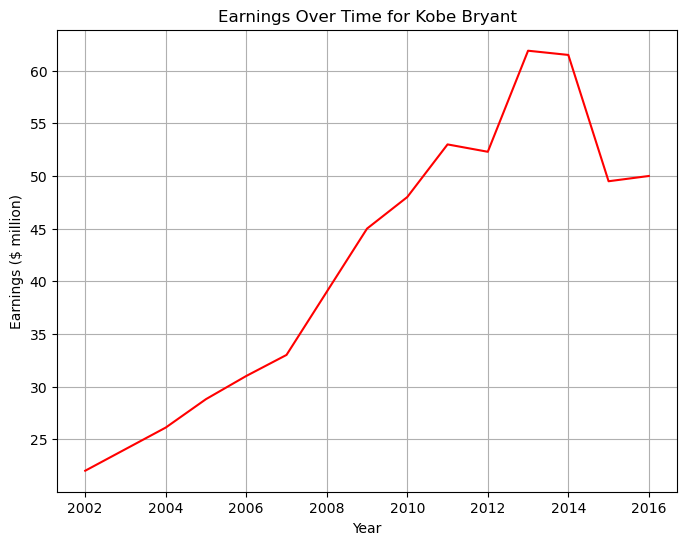

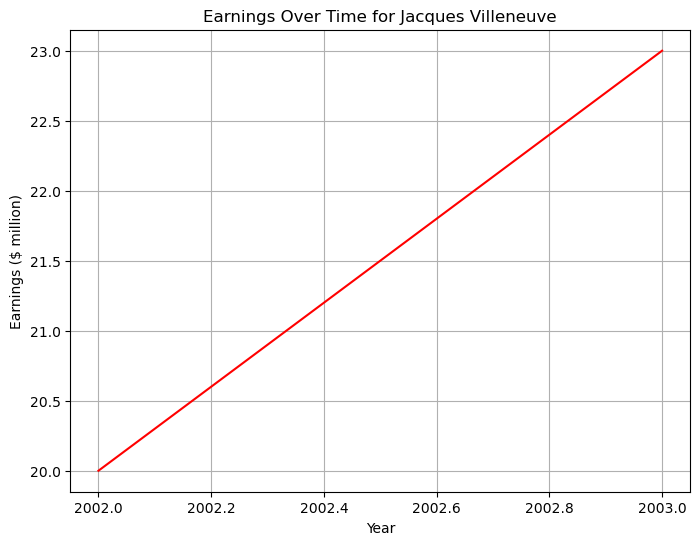

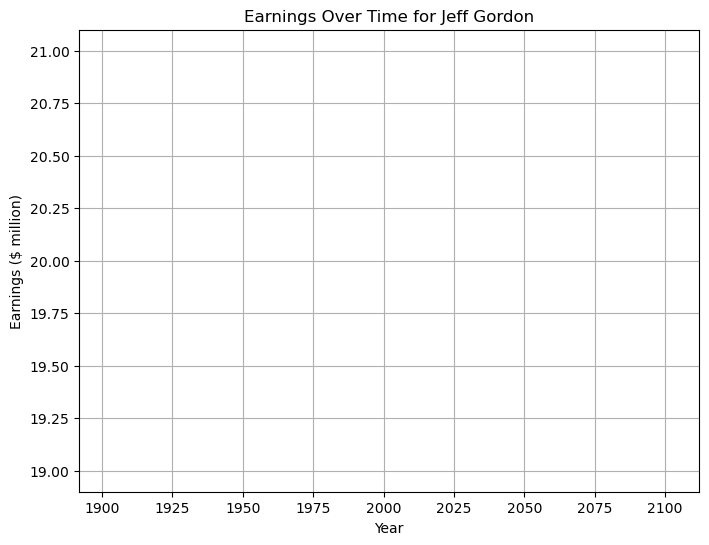

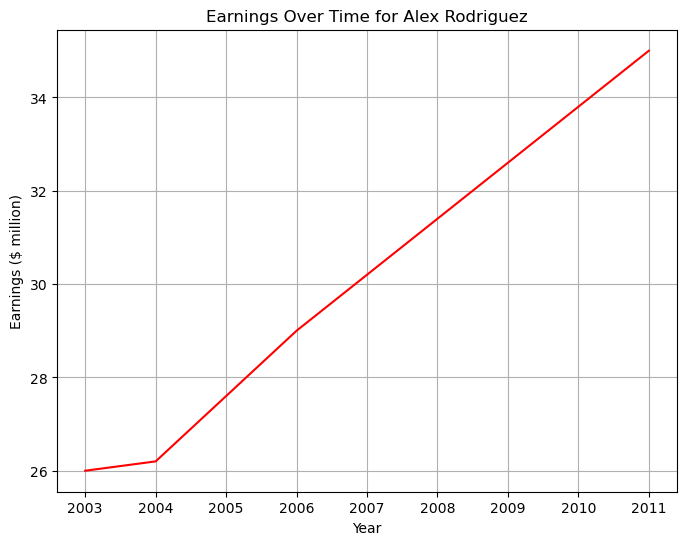

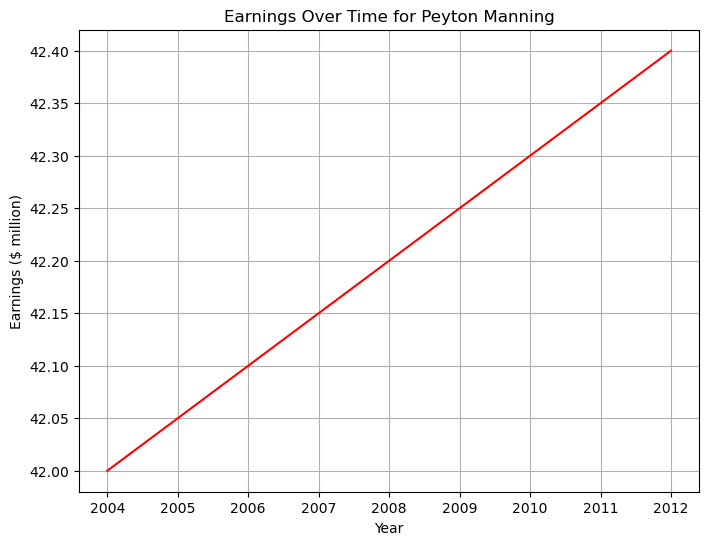

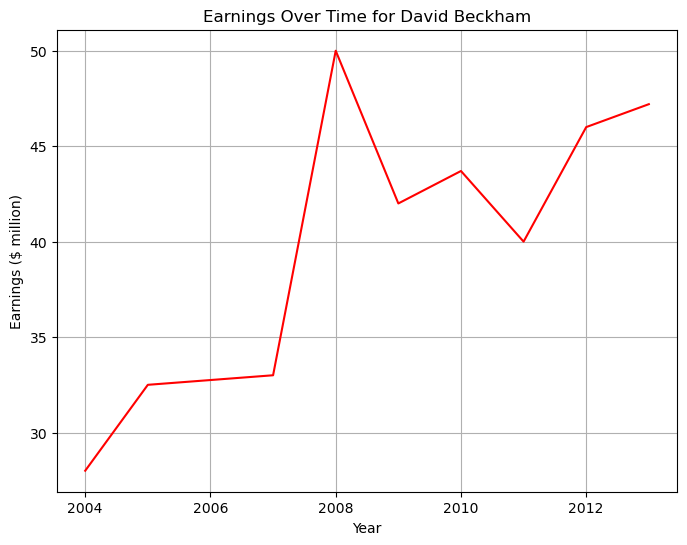

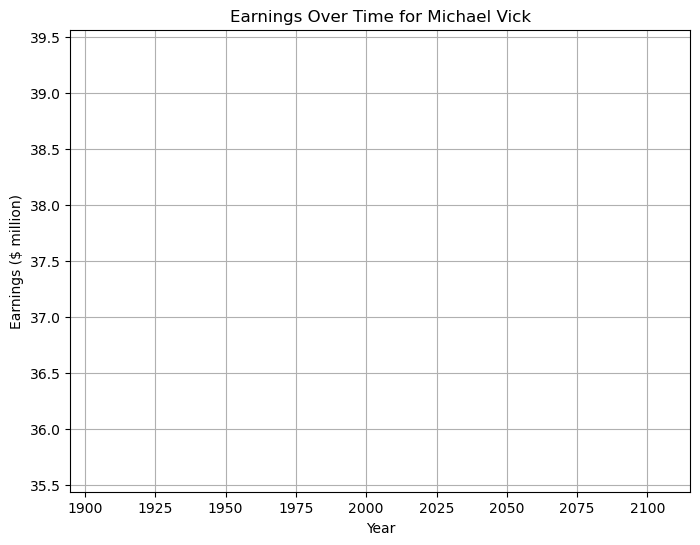

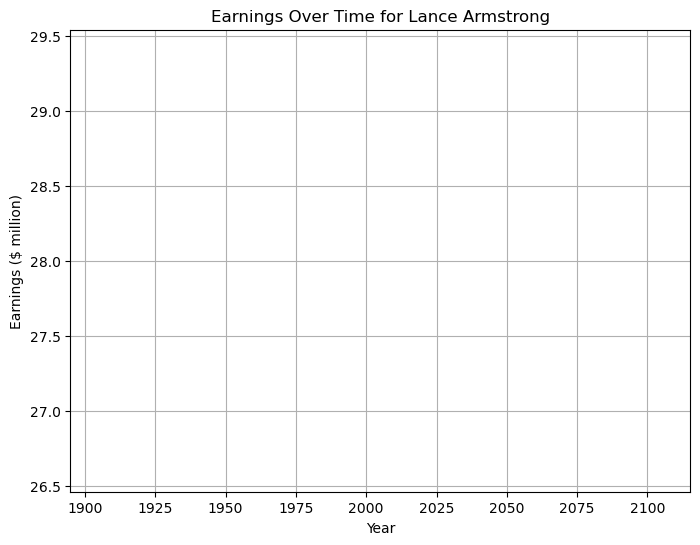

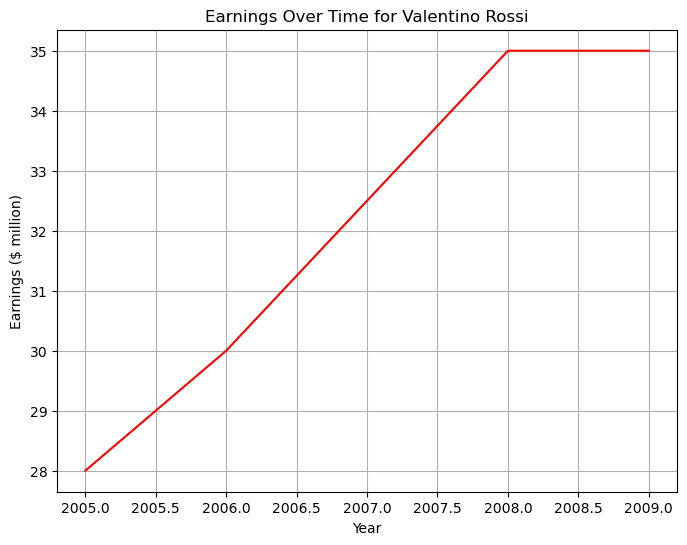

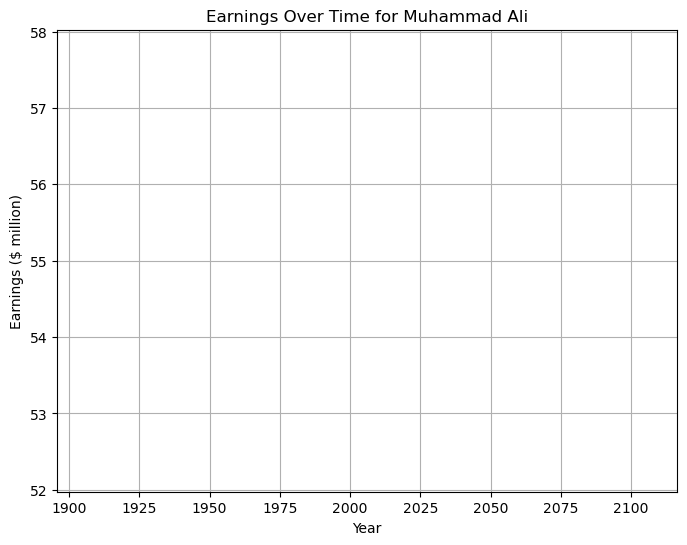

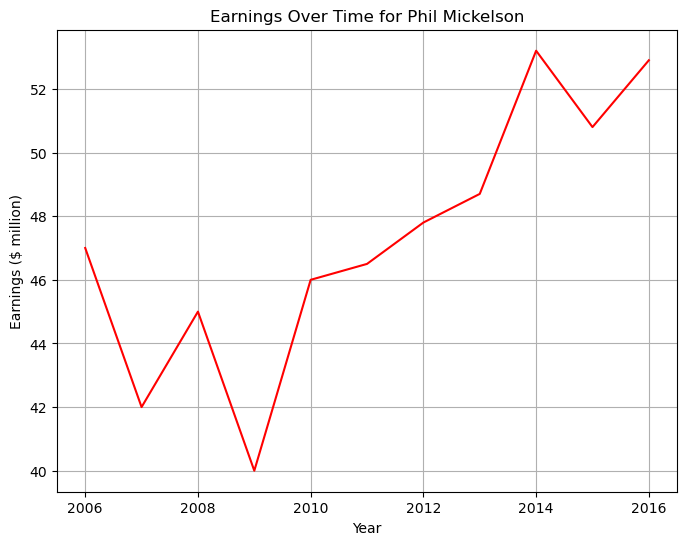

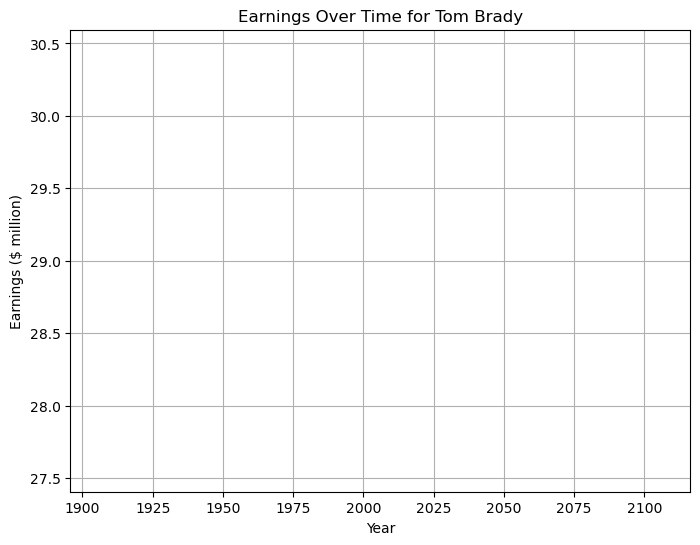

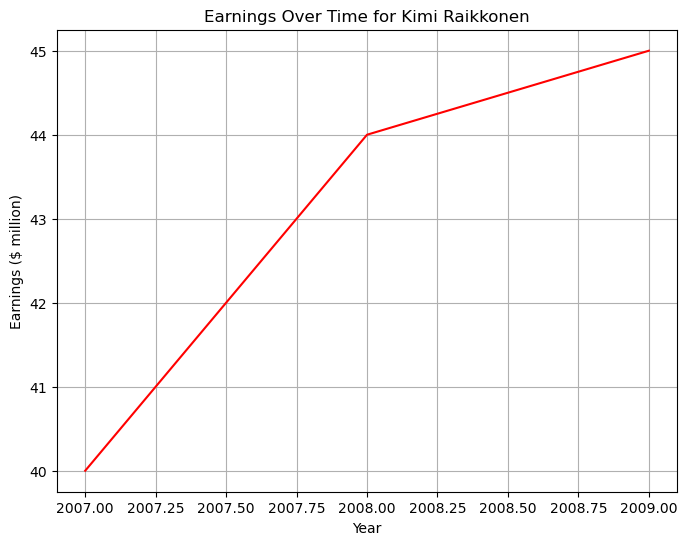

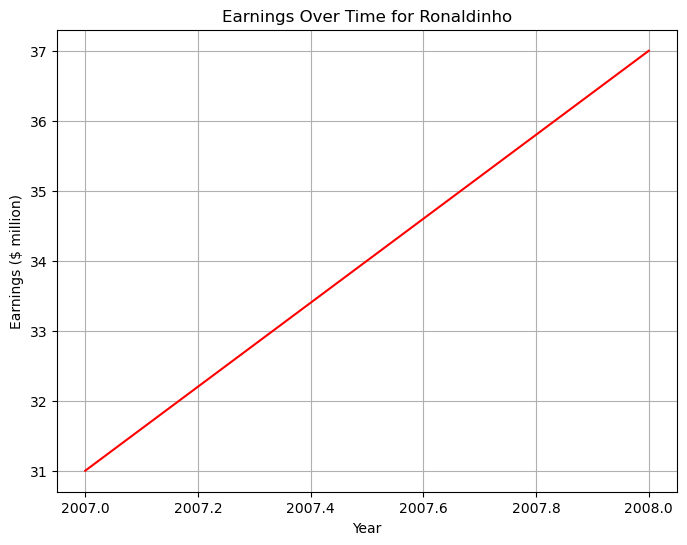

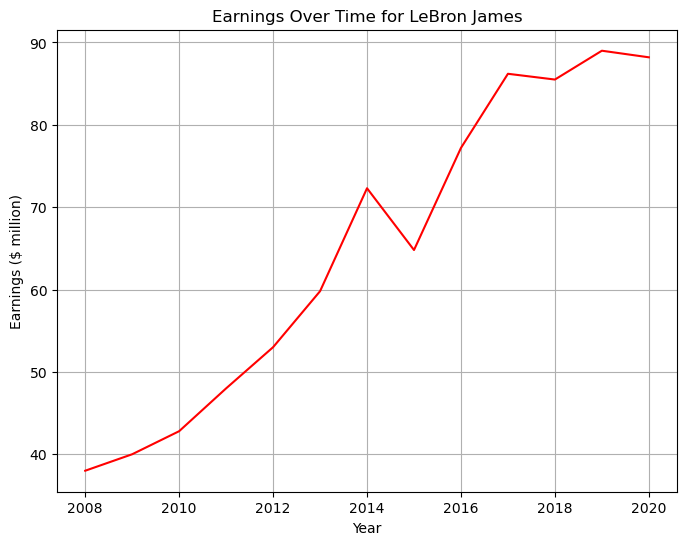

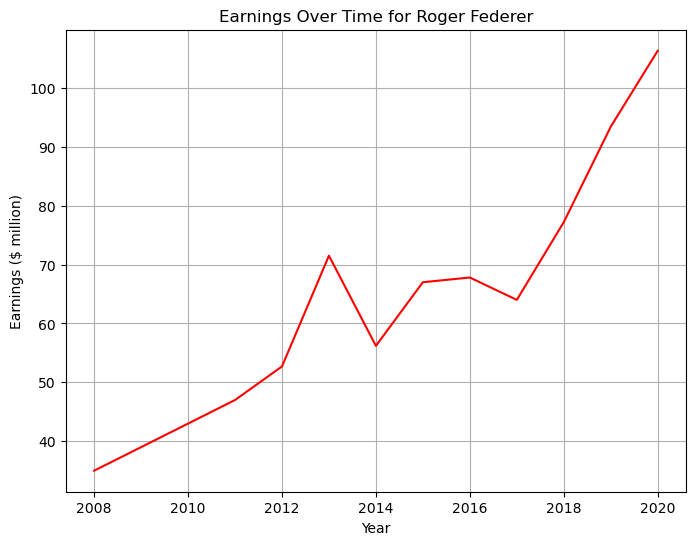

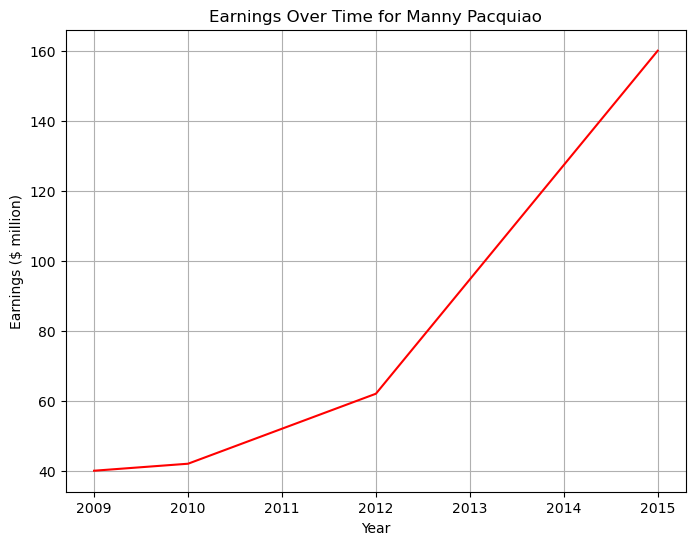

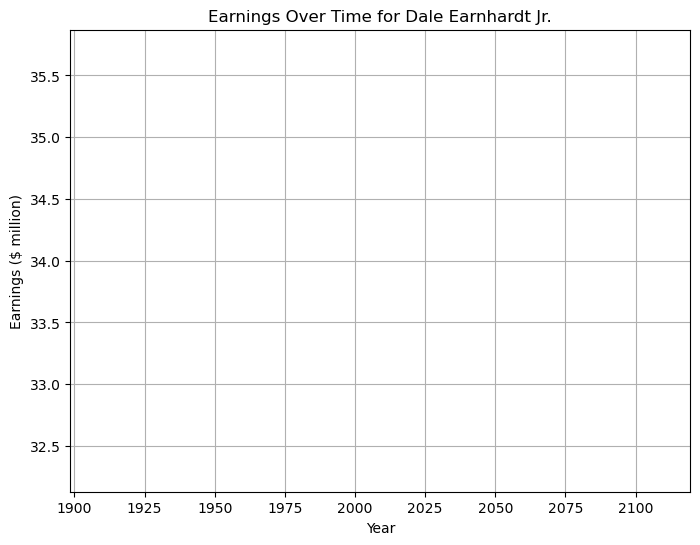

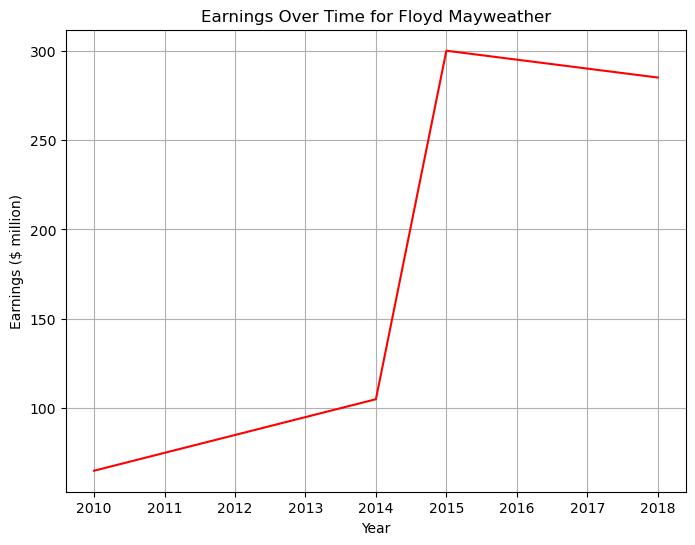

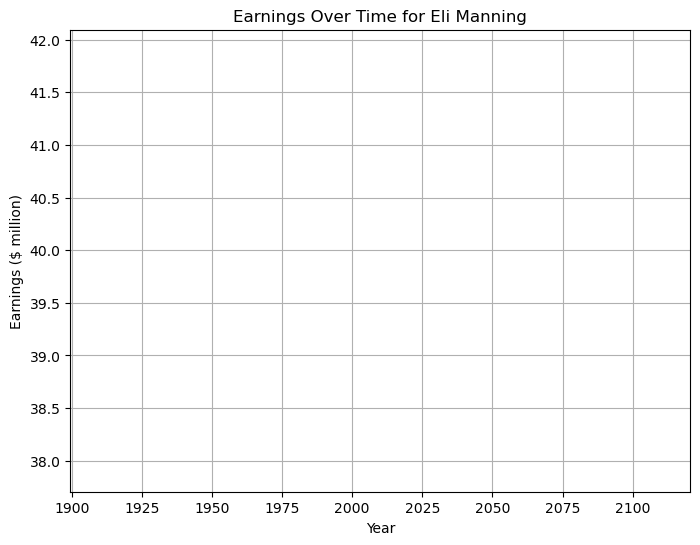

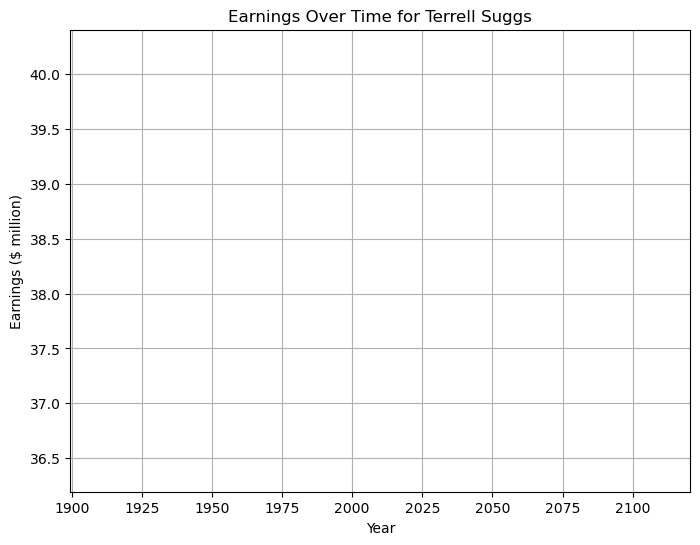

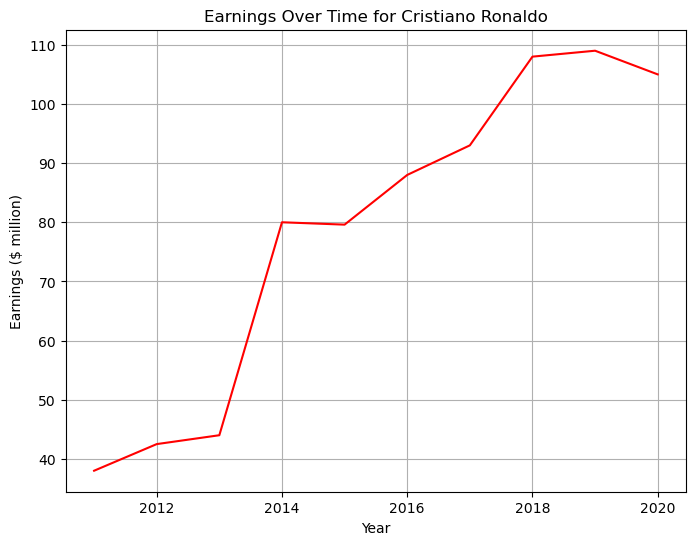

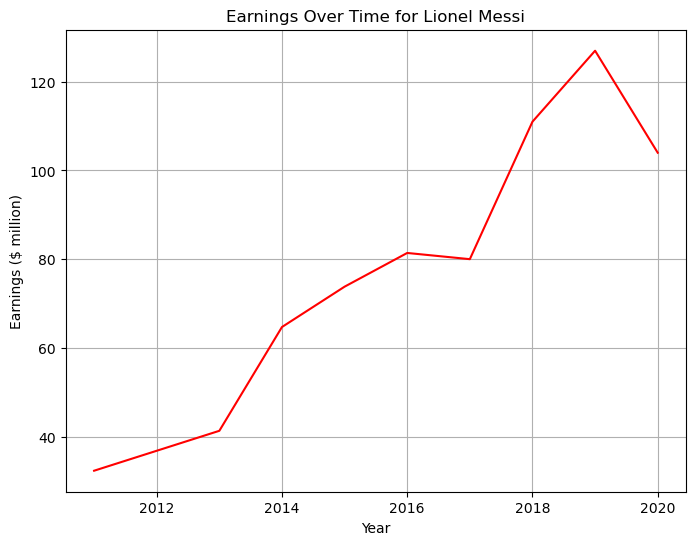

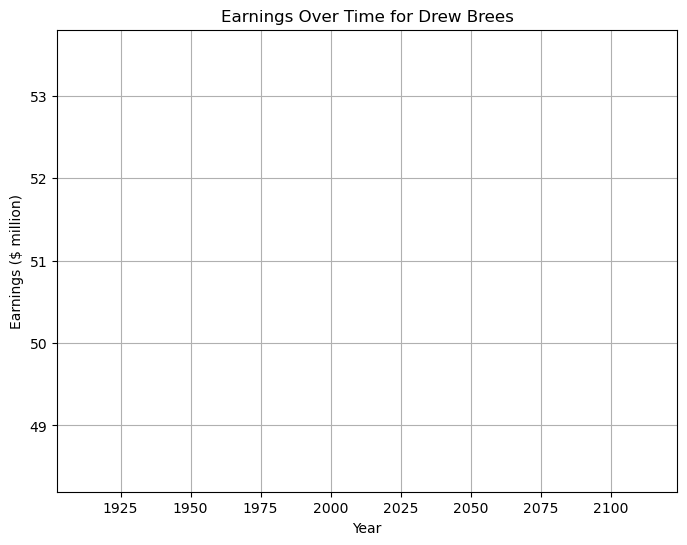

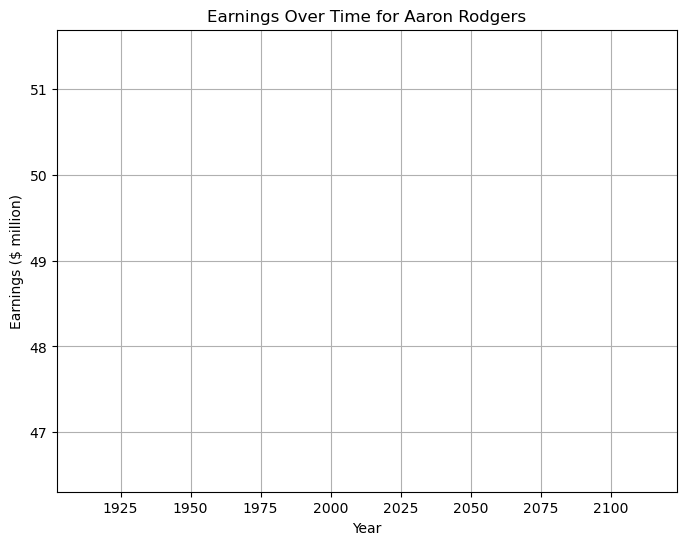

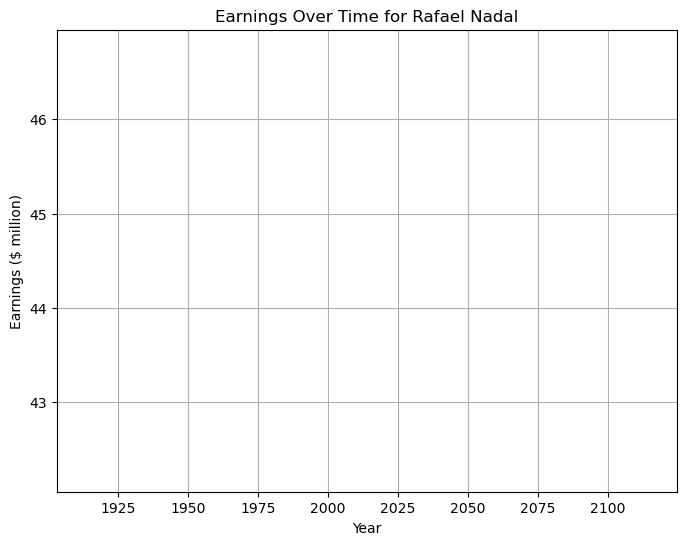

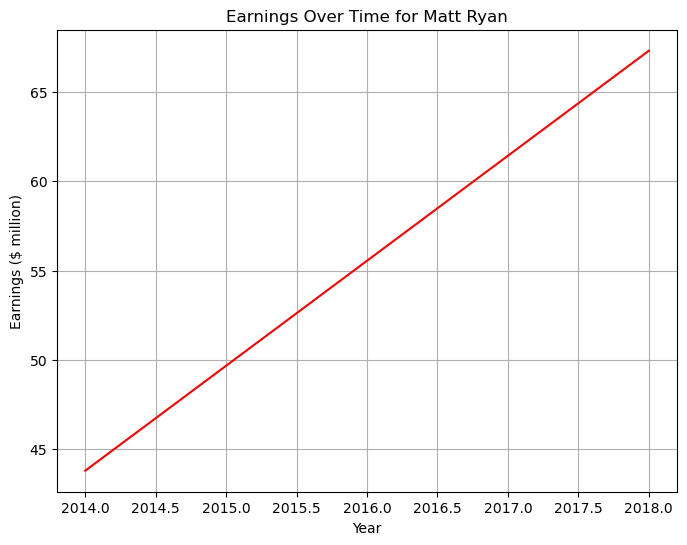

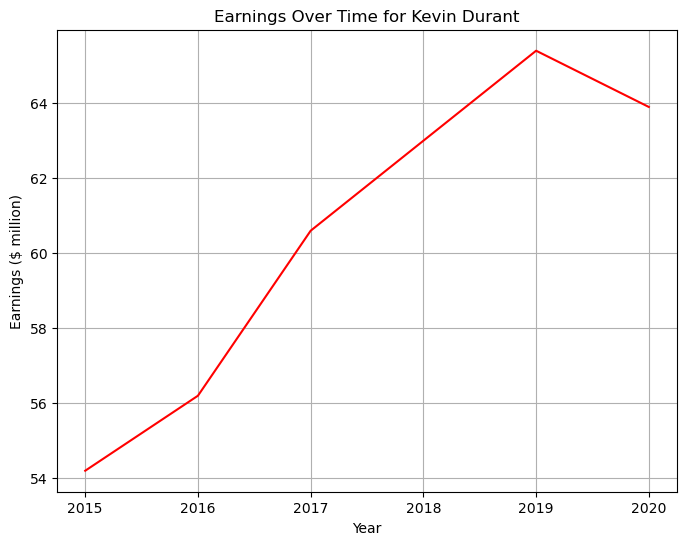

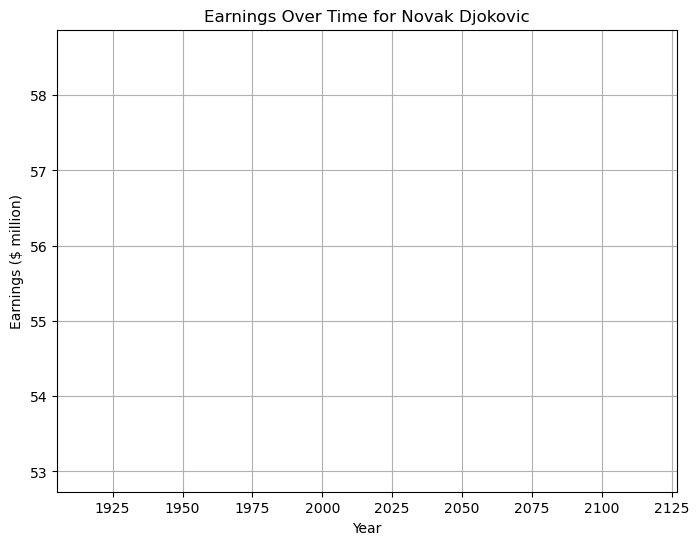

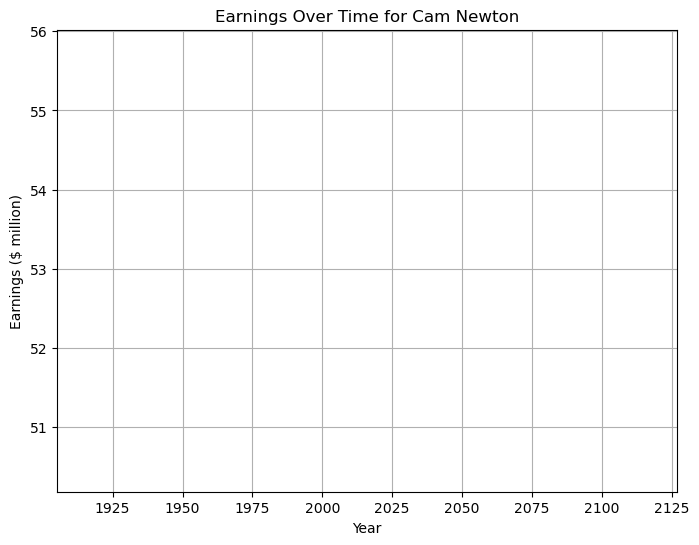

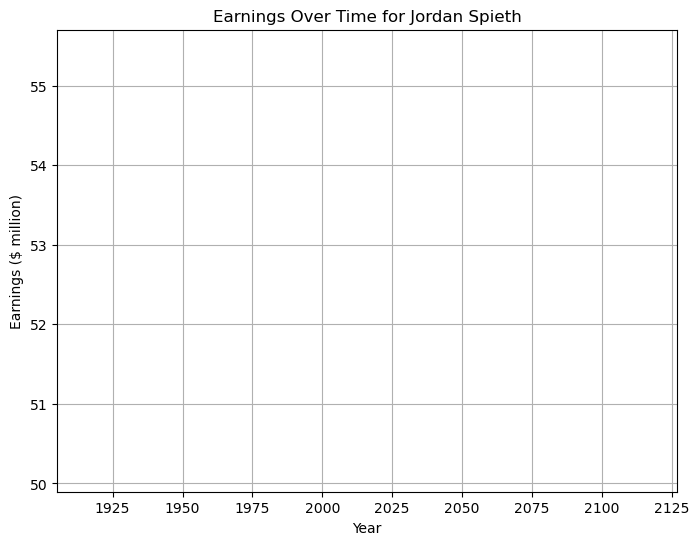

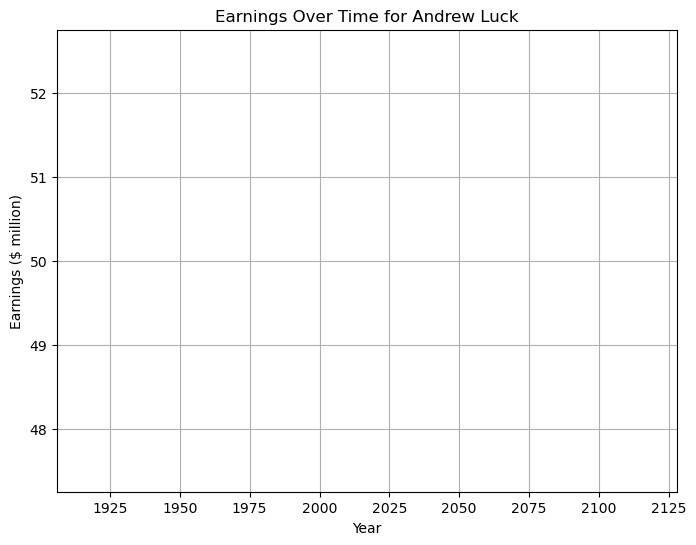

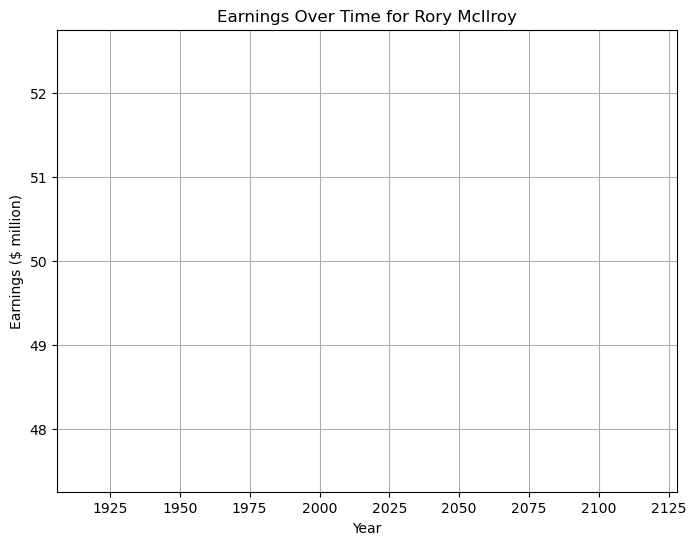

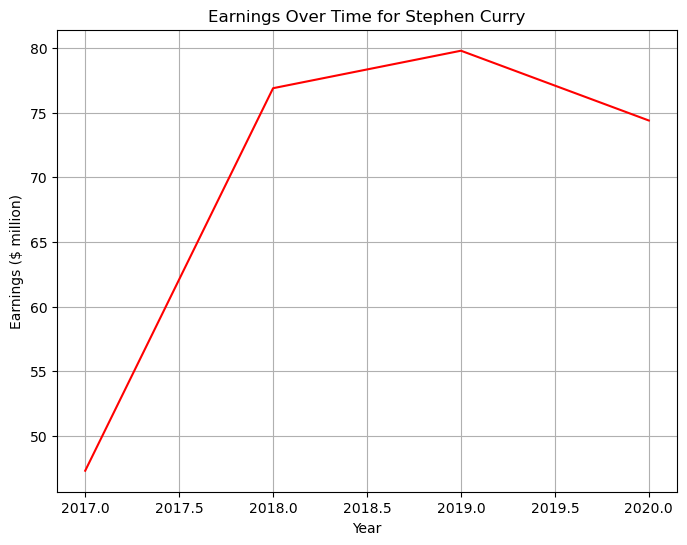

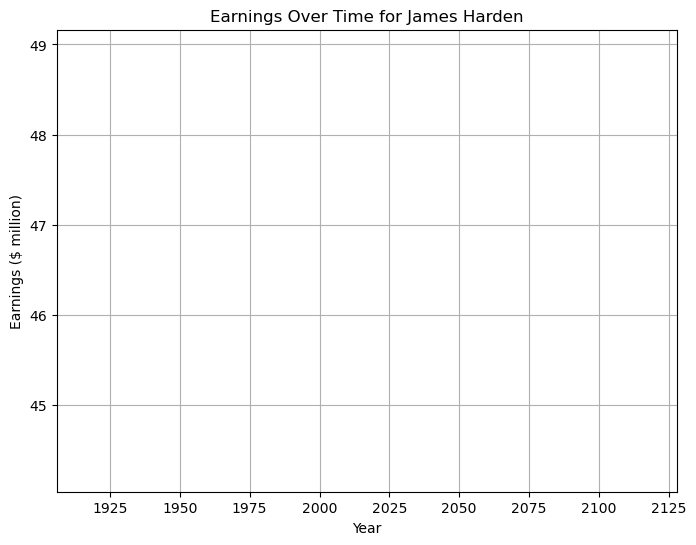

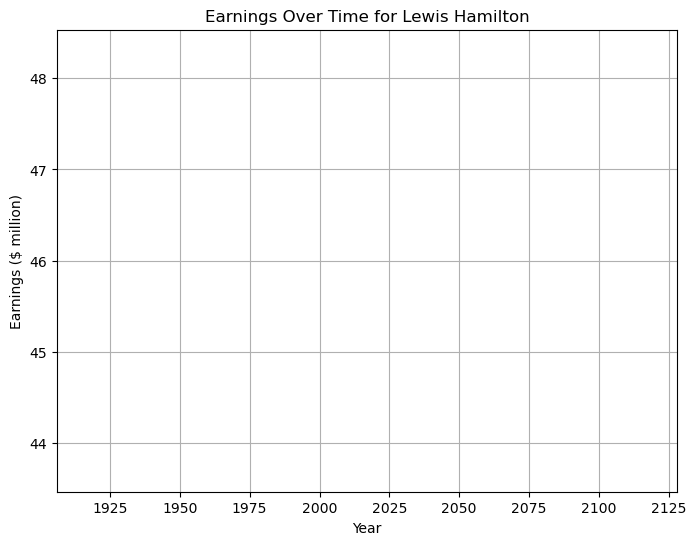

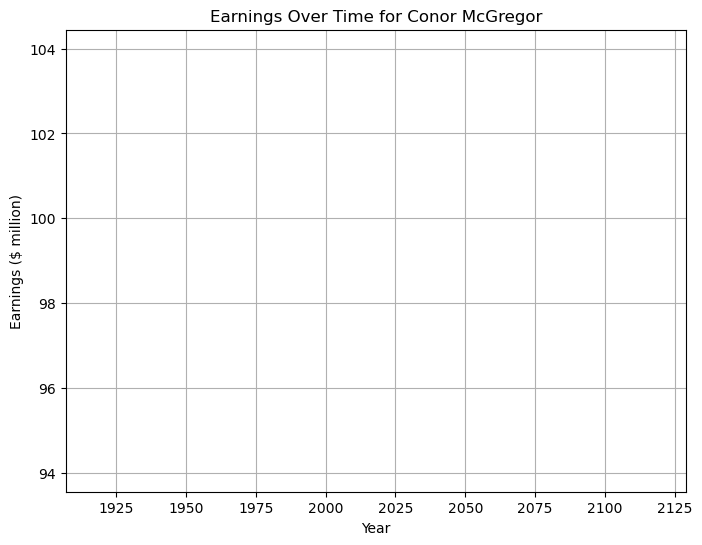

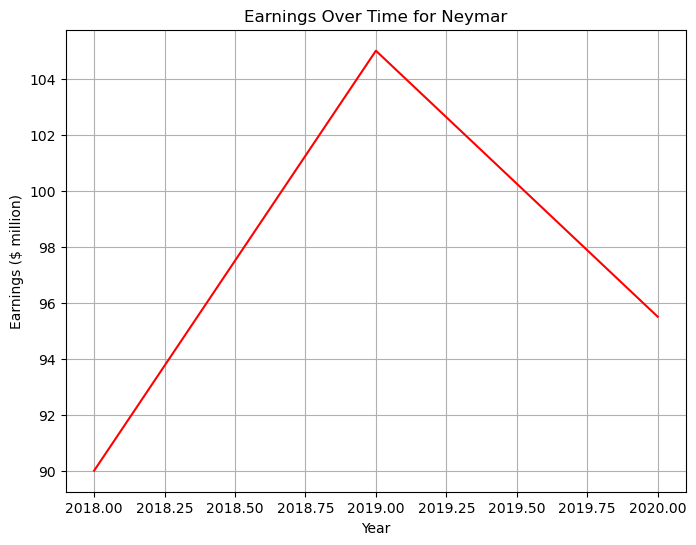

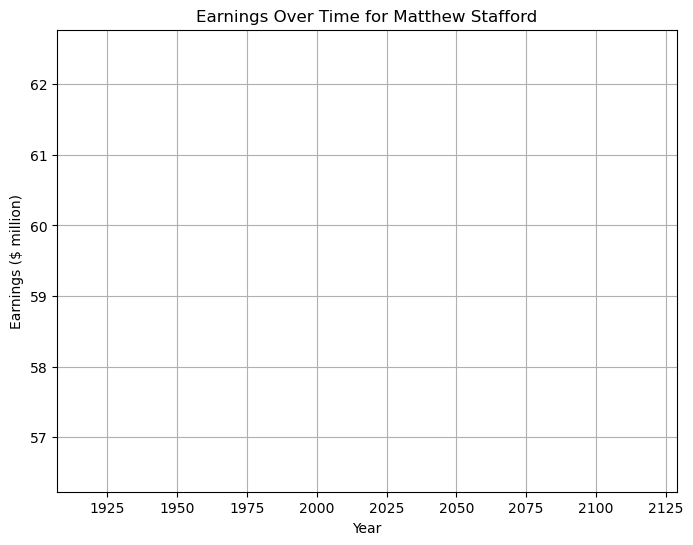

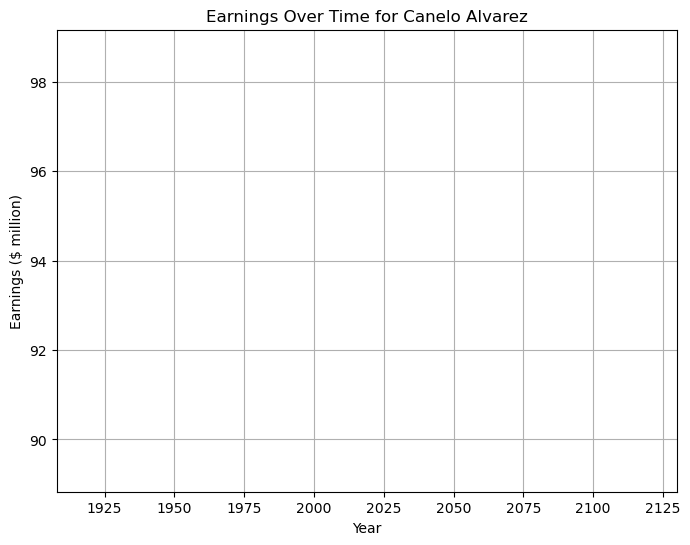

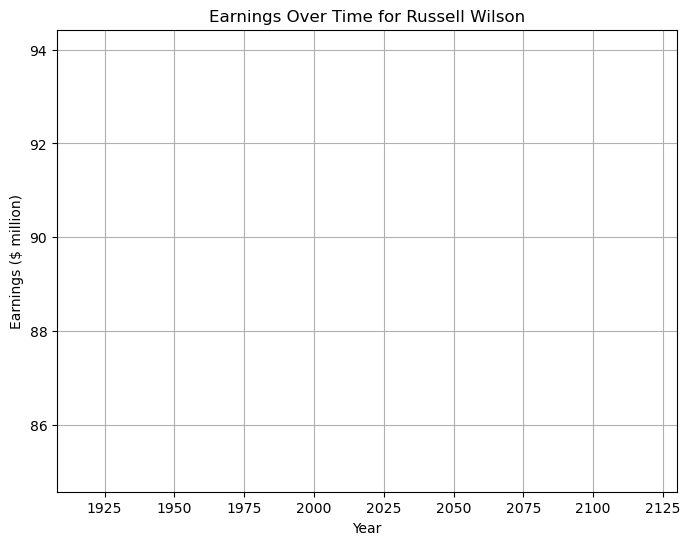

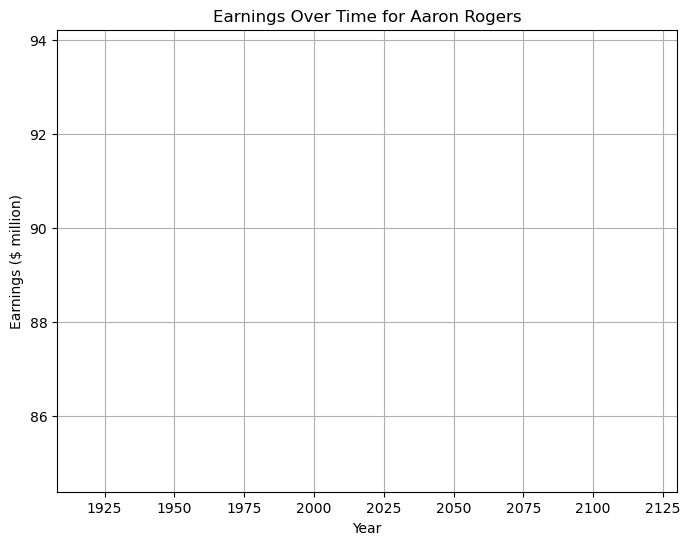

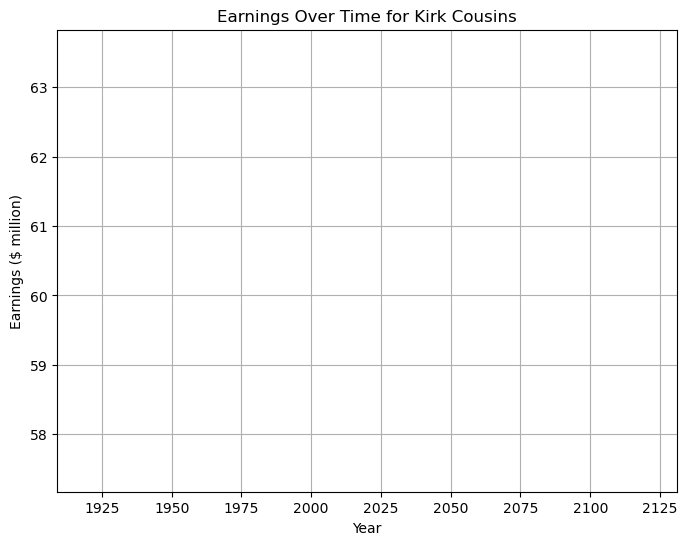

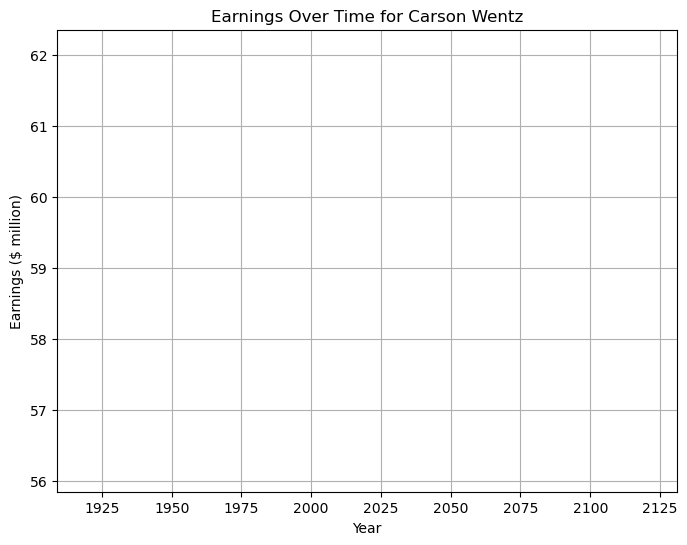

In [66]:
players = dataset['Name'].unique()

for player in players:
    player_data = dataset[dataset['Name'] == player]
    plt.figure(figsize=(8, 6))
    plt.plot(player_data['Year'], player_data['earnings ($ million)'],color='red')
    plt.xlabel('Year')
    plt.ylabel('Earnings ($ million)')
    plt.title(f'Earnings Over Time for {player}')
    plt.grid(True)
    plt.show()